In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import scipy.stats as ss

In [2]:
import sys
sys.path.append("../functions/")
#for data preprocessing
import Scripts_Data_Processing
import imp

imp.reload(Scripts_Data_Processing)
from Scripts_Data_Processing import *
#for model fit
import Scripts_LogRegModels_v2
imp.reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

import Triplets_Correlations_Scatterplots
imp.reload( Triplets_Correlations_Scatterplots)
from  Triplets_Correlations_Scatterplots import *

import Single_LogRegModels
imp.reload(Single_LogRegModels)
from Single_LogRegModels import fit_model_singRL

import NoBrainer_Analysis_AllinOne
imp.reload( NoBrainer_Analysis_AllinOne)
from  NoBrainer_Analysis_AllinOne import *

import Wrappers
imp.reload(Wrappers)
from Wrappers import *

from Exclusion import *

import Plot_models
imp.reload(Plot_models)
from Plot_models import *

import Trait_Data
imp.reload(Trait_Data)
from Trait_Data import *

# Load & Prepare Questionnaire Data

## STAI

20-39 low
40-59 high
60-80 extreme

### STAI Day 1

In [3]:
STAI1_df = load_trait_data(sheet = 'STAI', header = 3, lastcol = 30, start = 43, end = 49)
STAI1_df = STAI1_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_1', 'Positive affect': 'PositiveAffect_1', 'Trait anxiety': 'TraitAnxiety_1', 'Trait anxiety sub': 'TraitAnxietySub_1', 'Trait depression sub': 'TraitDepressionSub_1'})
STAI1_df.head()

Question,level_0,MID,StateAnxiety_1,PositiveAffect_1,TraitAnxiety_1,TraitAnxietySub_1,TraitDepressionSub_1
0,0,vp06,21,19,22,8,14
1,1,vp07,30,16,32,11,21
2,2,vp10,47,11,43,14,29
3,3,vp11,28,18,32,9,23
4,4,vp12,49,12,44,14,30


### STAI Day 2

In [4]:
STAI2_df = load_trait_data(sheet = 'STAI2', header = 3, lastcol = 30, start = 43, end = 49)
STAI2_df = STAI2_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_2', 'Positive affect': 'PositiveAffect_2', 'Trait anxiety': 'TraitAnxiety_2', 'Trait anxiety sub': 'TraitAnxietySub_2', 'Trait depression sub': 'TraitDepressionSub_2'})
STAI2_df.head()

Question,level_0,MID,StateAnxiety_2,PositiveAffect_2,TraitAnxiety_2,TraitAnxietySub_2,TraitDepressionSub_2
0,0,vp06,28,17,29,7,22
1,1,vp07,31,15,28,8,20
2,2,vp10,39,16,43,14,29
3,3,vp11,26,18,27,7,20
4,4,vp12,31,19,42,14,28


### STAI Day 3

In [5]:
STAI3_df = load_trait_data(sheet = 'STAI3', header = 3, lastcol = 8, start = 43, end = 49)
STAI3_df = STAI3_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_3', 'Positive affect': 'PositiveAffect_3', 'Trait anxiety': 'TraitAnxiety_3', 'Trait anxiety sub': 'TraitAnxietySub_3', 'Trait depression sub': 'TraitDepressionSub_3'})
STAI3_df.head()

Question,level_0,MID,StateAnxiety_3,PositiveAffect_3,TraitAnxiety_3,TraitAnxietySub_3,TraitDepressionSub_3
0,0,vp16,29,20,29,9,20
1,1,vp23,42,13,41,13,28
2,2,vp25,44,9,36,9,27
3,3,vp26,19,20,22,7,15
4,4,vp27,20,20,26,9,17


### STAI Dataframe and Correlations (Sanity Check)

In [6]:
STAI_df = STAI1_df.merge(STAI2_df, 'left')
STAI_df = STAI_df.merge(STAI3_df, 'left', on='MID')
STAI_df['StateAnxiety'] = STAI_df[['StateAnxiety_1', 'StateAnxiety_2', 'StateAnxiety_3']].mean(axis=1)
STAI_df['PositiveAffect'] = STAI_df[['PositiveAffect_1', 'PositiveAffect_2', 'PositiveAffect_3']].mean(axis=1)
STAI_df['TraitAnxiety'] = STAI_df[['TraitAnxiety_1', 'TraitAnxiety_2', 'TraitAnxiety_3']].mean(axis=1)
STAI_df['TraitAnxietySub'] = STAI_df[['TraitAnxietySub_1', 'TraitAnxietySub_2', 'TraitAnxietySub_3']].mean(axis=1)
STAI_df['TraitDepressionSub'] = STAI_df[['TraitDepressionSub_1', 'TraitDepressionSub_2', 'TraitDepressionSub_3']].mean(axis=1)

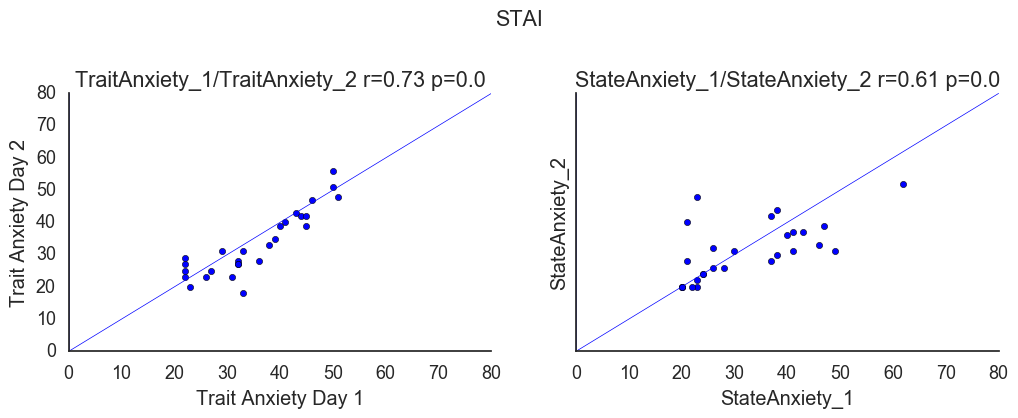

In [7]:
f = plotSTAI(STAI_df, 'STAI')


In [8]:
STAI_df.head()

Question,level_0_x,MID,StateAnxiety_1,PositiveAffect_1,TraitAnxiety_1,TraitAnxietySub_1,TraitDepressionSub_1,StateAnxiety_2,PositiveAffect_2,TraitAnxiety_2,...,StateAnxiety_3,PositiveAffect_3,TraitAnxiety_3,TraitAnxietySub_3,TraitDepressionSub_3,StateAnxiety,PositiveAffect,TraitAnxiety,TraitAnxietySub,TraitDepressionSub
0,0,vp06,21,19,22,8,14,28,17,29,...,NaN,NaN,NaN,NaN,NaN,24.5,18.0,25.5,7.5,18.0
1,1,vp07,30,16,32,11,21,31,15,28,...,NaN,NaN,NaN,NaN,NaN,30.5,15.5,30.0,9.5,20.5
2,2,vp10,47,11,43,14,29,39,16,43,...,NaN,NaN,NaN,NaN,NaN,43.0,13.5,43.0,14.0,29.0
3,3,vp11,28,18,32,9,23,26,18,27,...,NaN,NaN,NaN,NaN,NaN,27.0,18.0,29.5,8.0,21.5
4,4,vp12,49,12,44,14,30,31,19,42,...,NaN,NaN,NaN,NaN,NaN,40.0,15.5,43.0,14.0,29.0


()

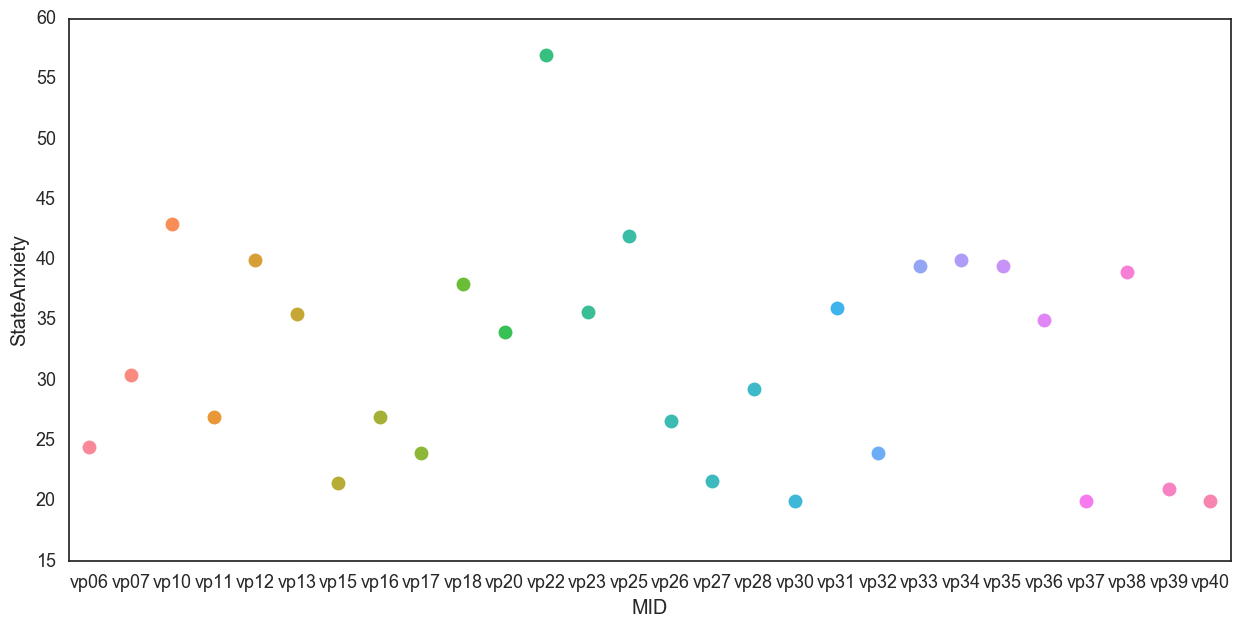

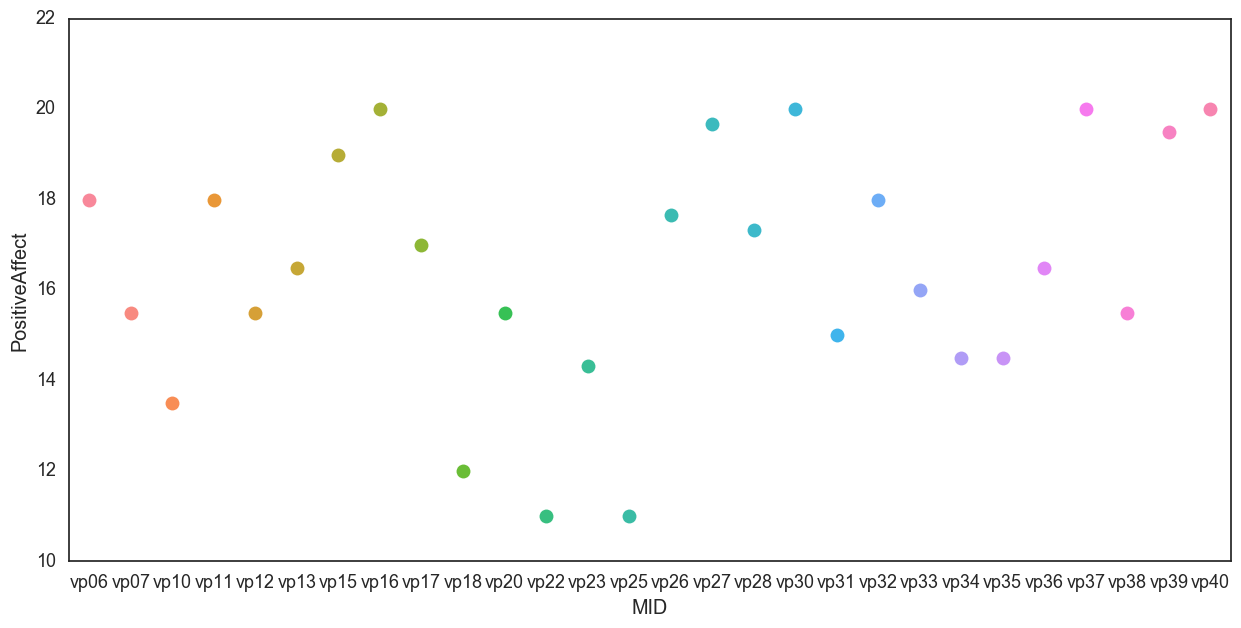

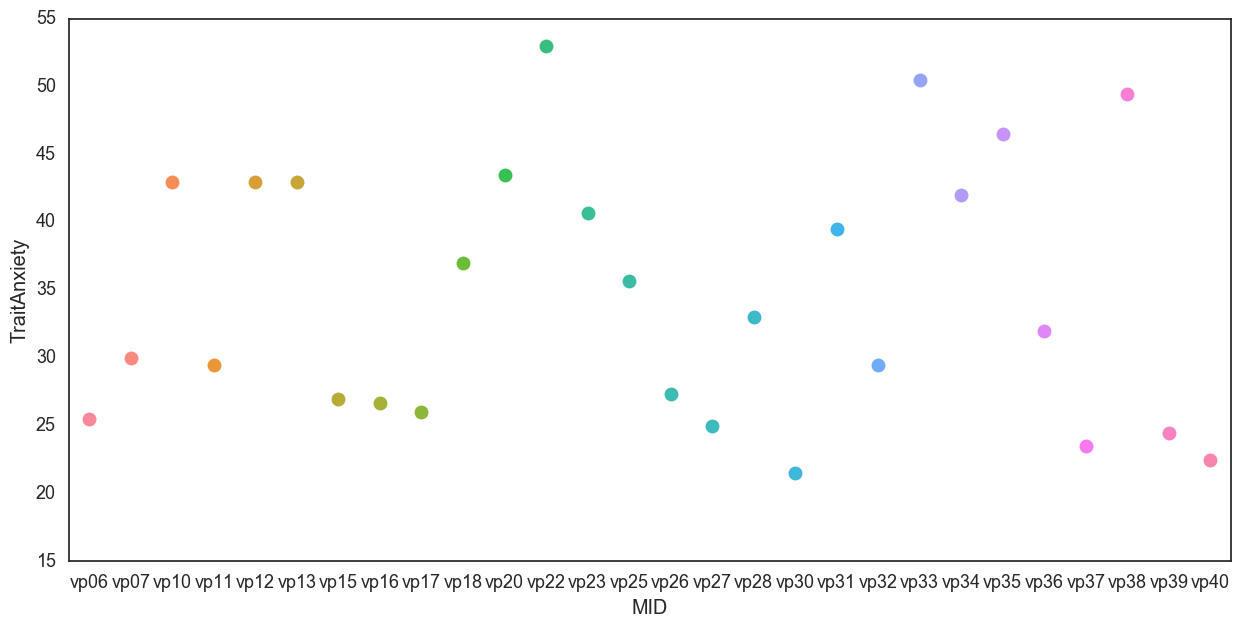

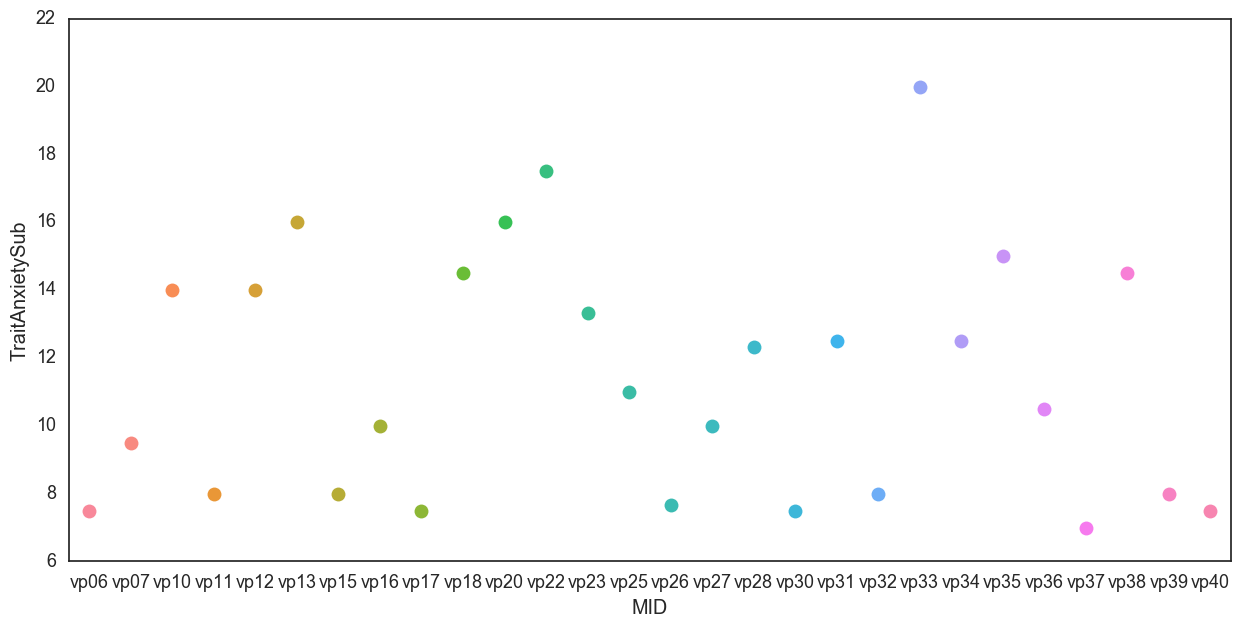

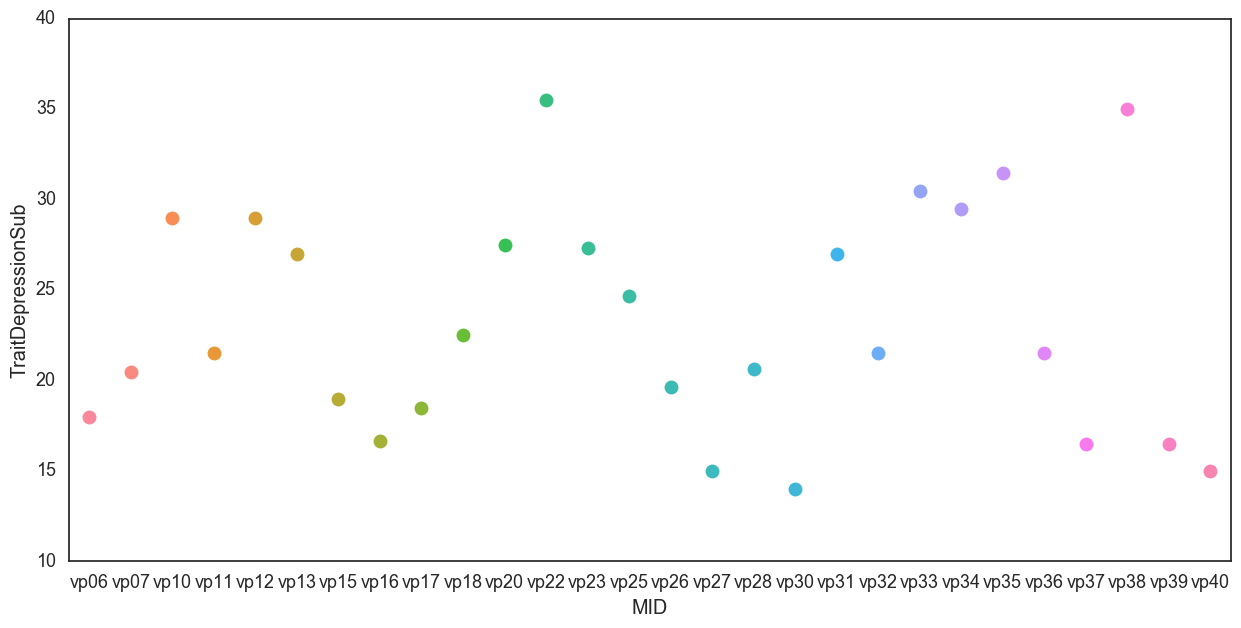

In [9]:
plotTraitperSub(STAI_df, y0 = 'StateAnxiety', y1 = 'PositiveAffect', y2 = 'TraitAnxiety', y3 = 'TraitAnxietySub', y4 = 'TraitDepressionSub')


## BDI

BDI Scale: 1-10 normal; 11-16 mild mood disturbance; 17-20 borderline clinical depression; 21-30 moderate depression; 31-40 severe depression; over 40 extreme depression

vp10,22,31,33 mild mood disturbance


In [10]:
BDI_df = load_trait_data(sheet = 'BDI', header = 3, lastcol = 29, start = 23, end = 26)
BDI_df = BDI_df.rename(columns={'index': 'MID'})
BDI_df.head()

Question,level_0,MID,BDI,Somatic-affective,Cognitive
0,0,vp07,0,0,0
1,1,vp10,11,6,2
2,2,vp11,4,1,3
3,3,vp12,3,2,1
4,4,vp13,4,2,1


()

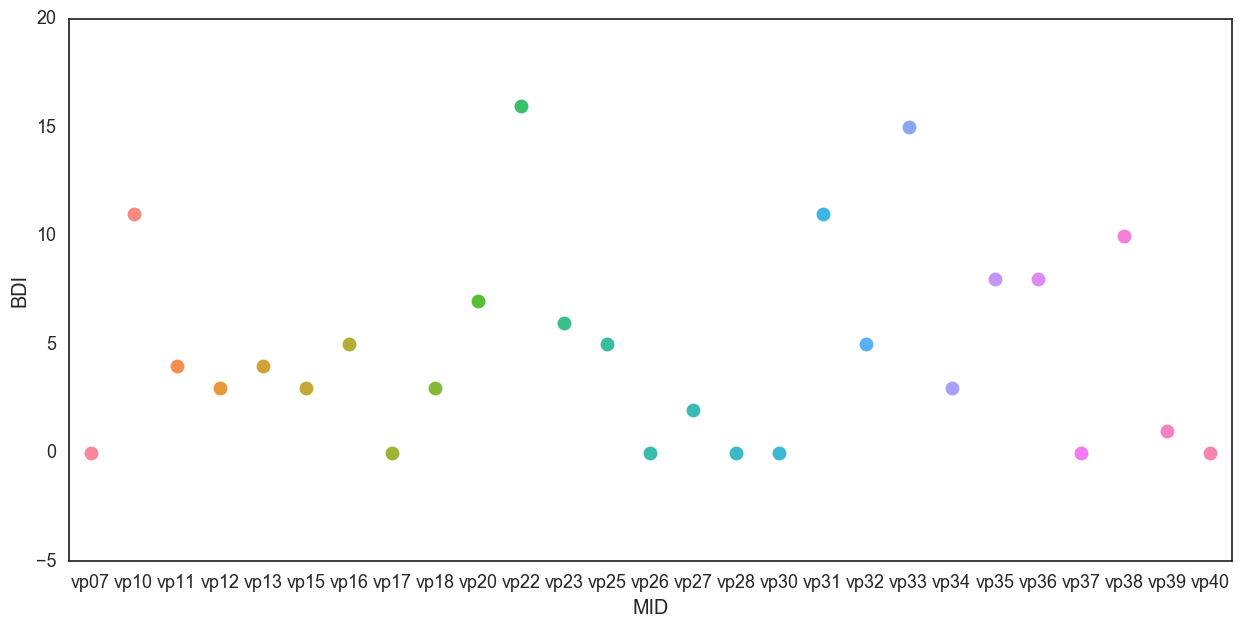

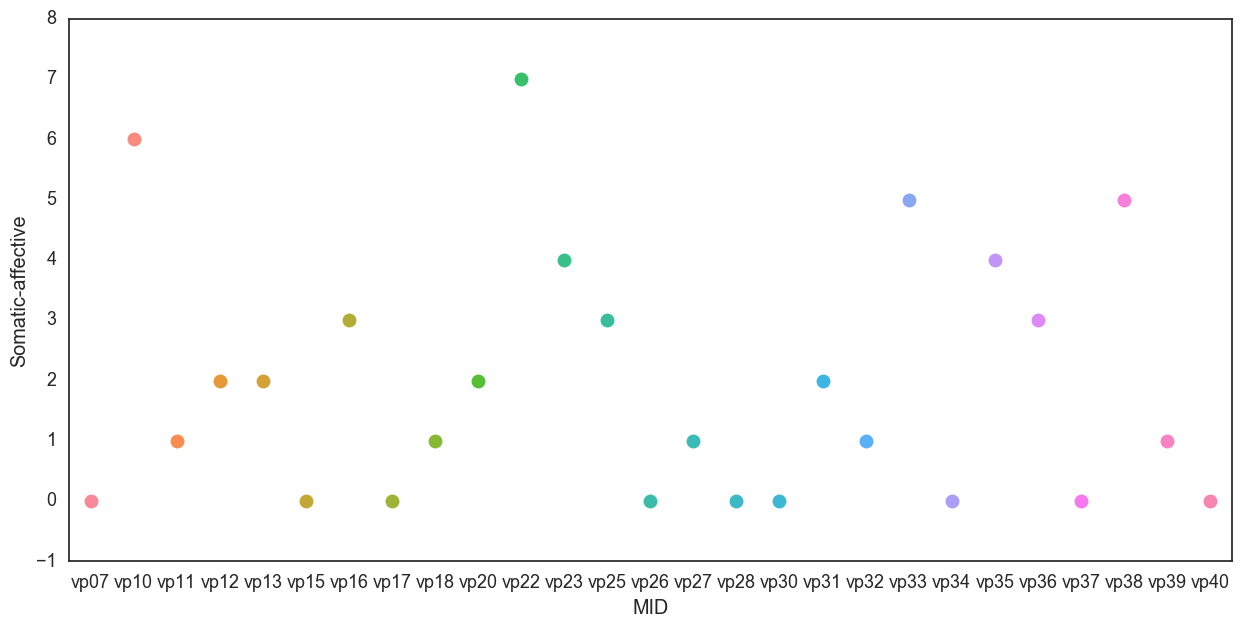

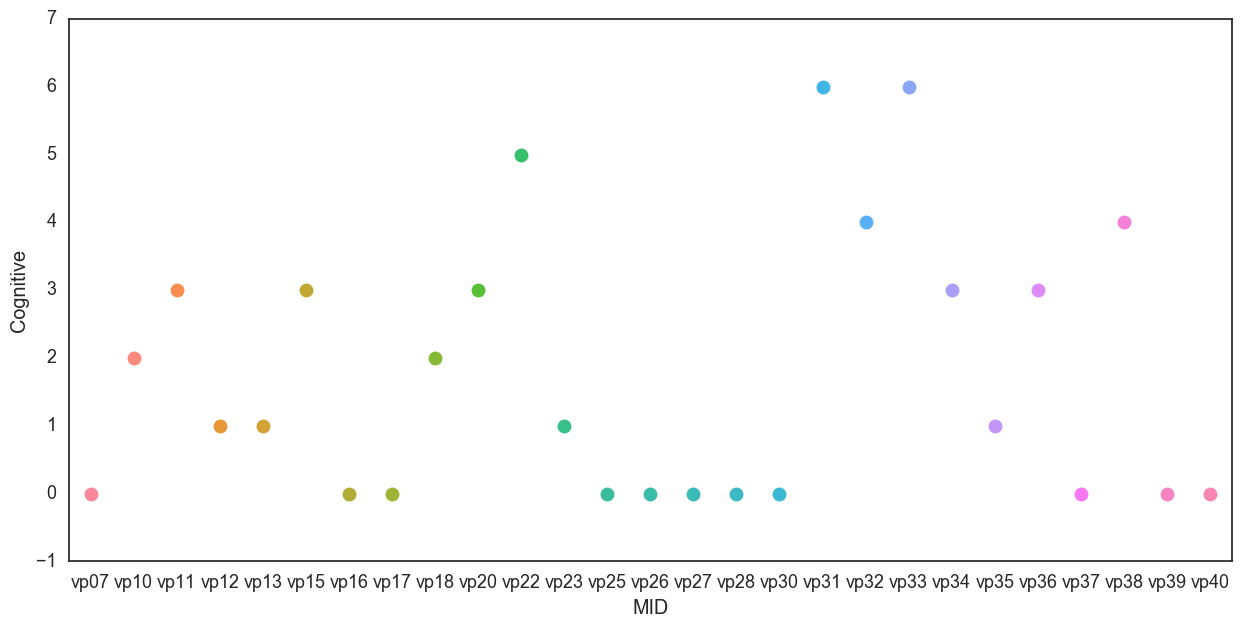

In [11]:
plotTraitperSub(BDI_df, y0 = 'BDI', y1 = 'Somatic-affective', y2 = 'Cognitive')


## MASQ

In [12]:
MASQ_df = load_trait_data(sheet = 'MASQ', header = 3, lastcol = 29, start = 92, end = 97)
MASQ_df = MASQ_df.rename(columns={'index': 'MID', 'General Distress: Mixed Symptoms': 'GD_Mixed', 'General Distress: Anxious Symptoms': 'GD_Anxious', 'Anxious Arousal': 'AnxiousArousal', 
                                  'General Distress: Depressive Symptoms': 'GD_Depressive', 'Anhedonic Depression': 'AnhedonicDepression'})
MASQ_df.head()

Question,level_0,MID,GD_Mixed,GD_Anxious,AnxiousArousal,GD_Depressive,AnhedonicDepression
0,0,vp07,23,17,20,14,41
1,1,vp10,32,24,20,25,72
2,2,vp11,21,15,18,17,48
3,3,vp12,25,17,19,19,44
4,4,vp13,34,27,24,31,63


()

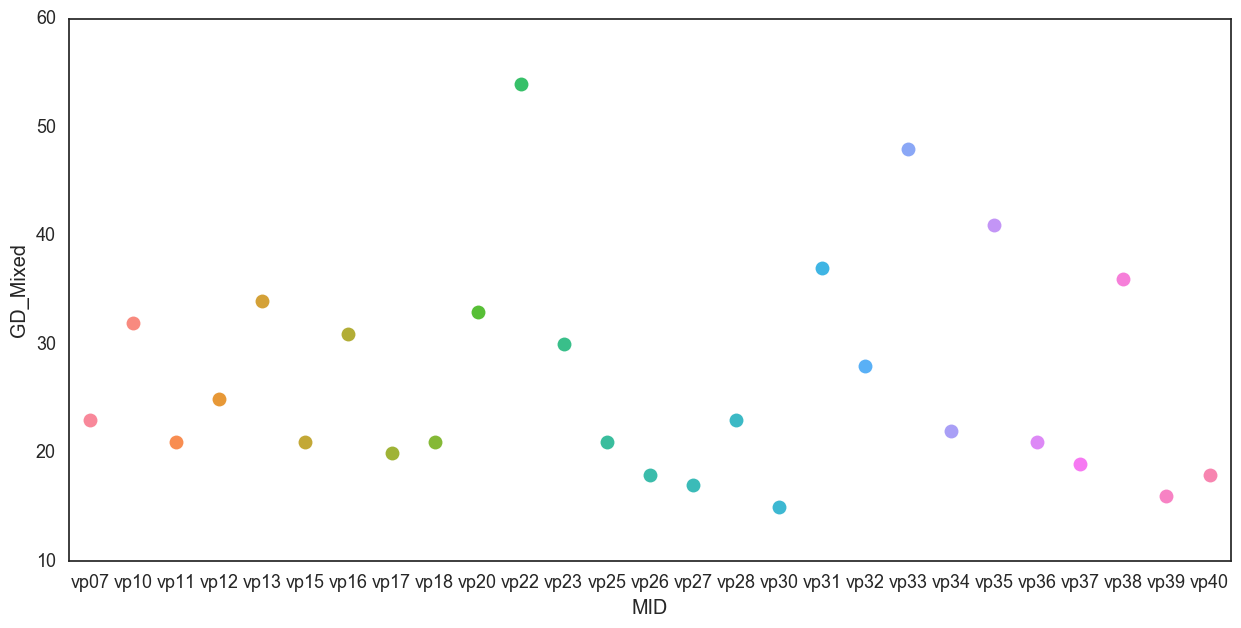

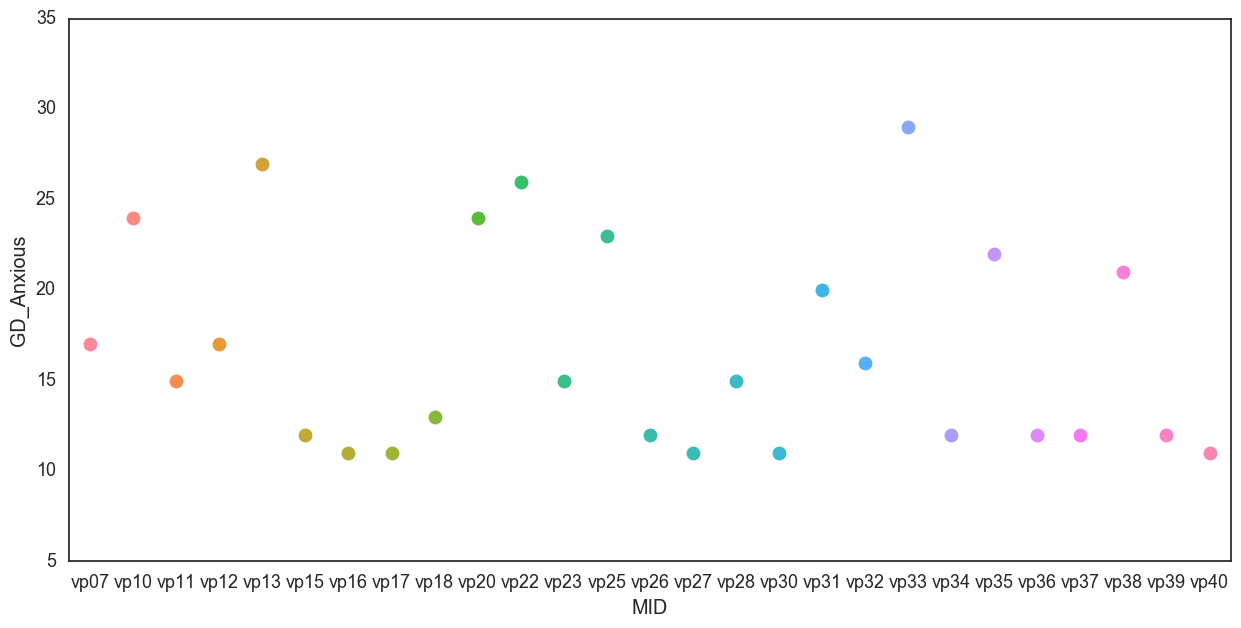

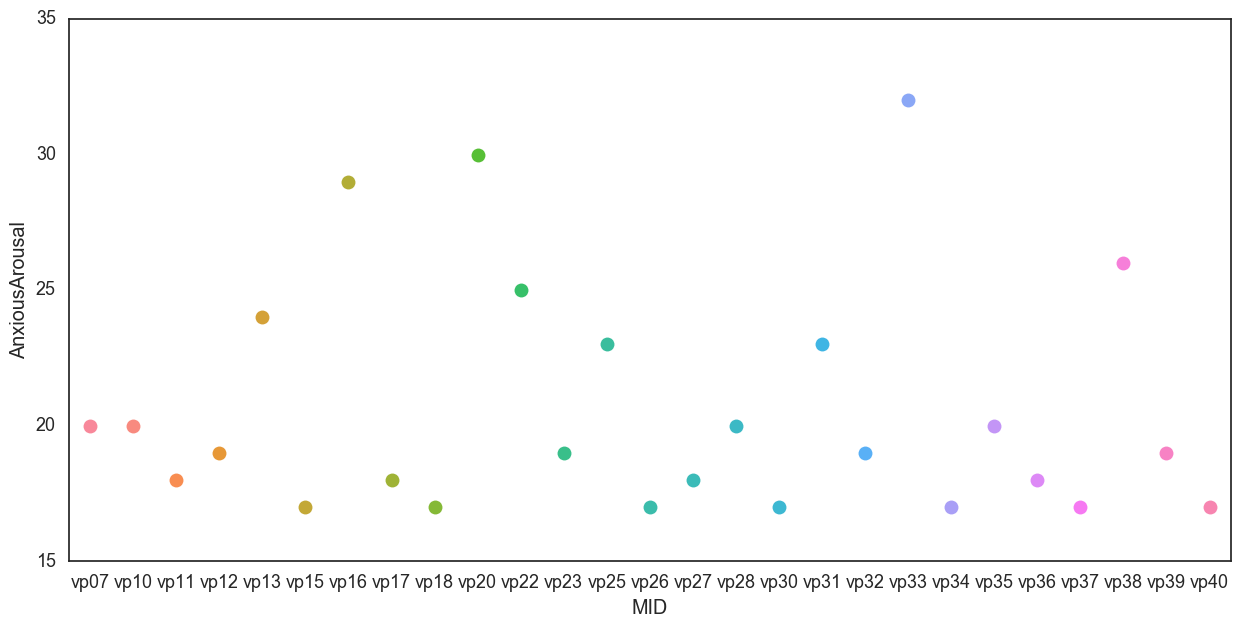

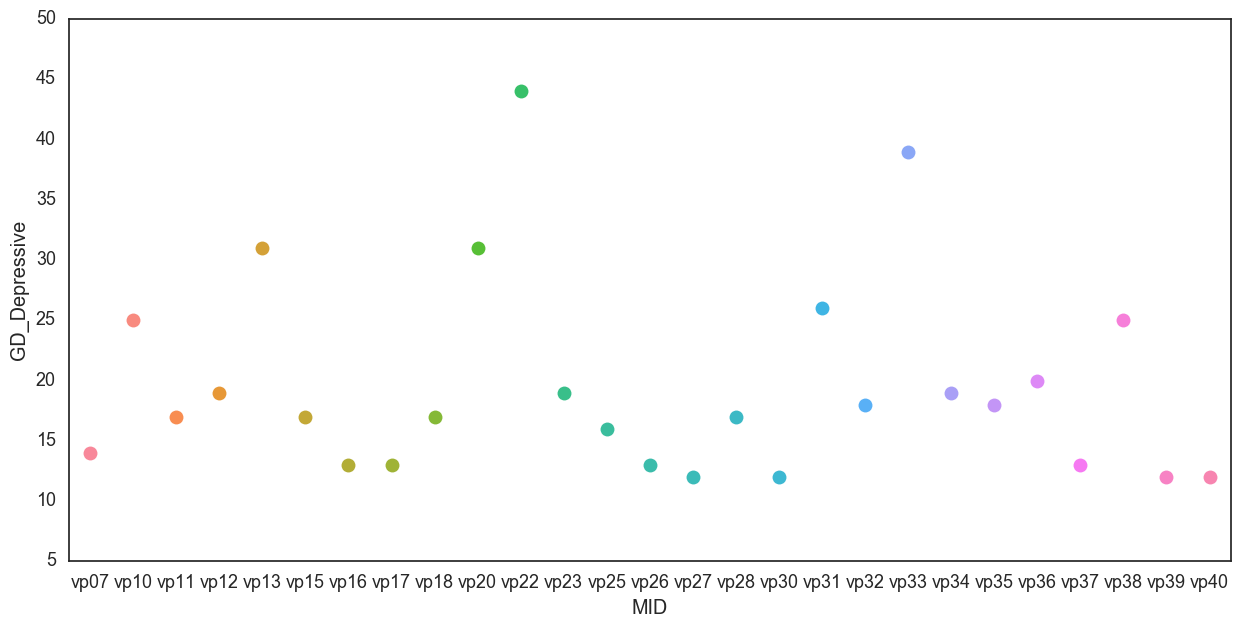

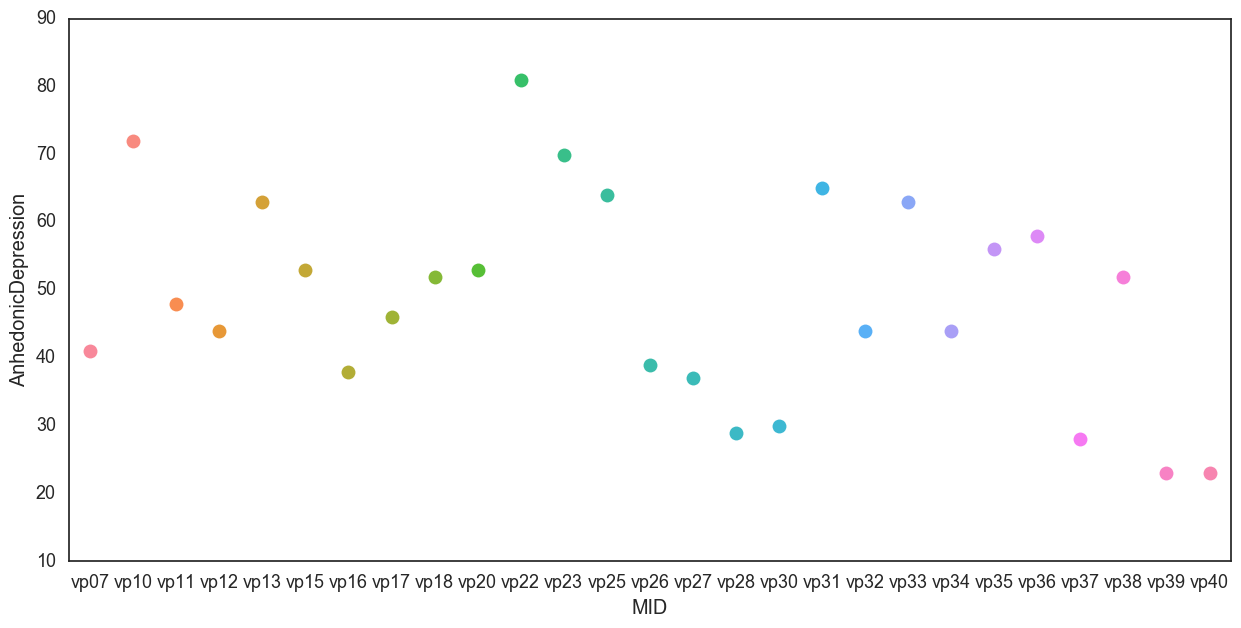

In [13]:
plotTraitperSub(MASQ_df, y0 = 'GD_Mixed', y1 = 'GD_Anxious', y2 = 'AnxiousArousal', y3 = 'GD_Depressive', y4 = 'AnhedonicDepression')


## IUS

In [14]:
IUS_df = load_trait_data(sheet = 'IUS', header = 2, lastcol = 29, start = 29, end = 32)
IUS_df = IUS_df.rename(columns={'index': 'MID'})
IUS_df.head()

Question,level_0,MID,Unifactorial,Uncertainty has negative behavioural and self-referent implications,Uncertainty is unfair and spoils everything
0,0,vp07,40,21,19
1,1,vp10,28,15,13
2,2,vp11,37,20,17
3,3,vp12,77,35,42
4,4,vp13,79,50,29


()

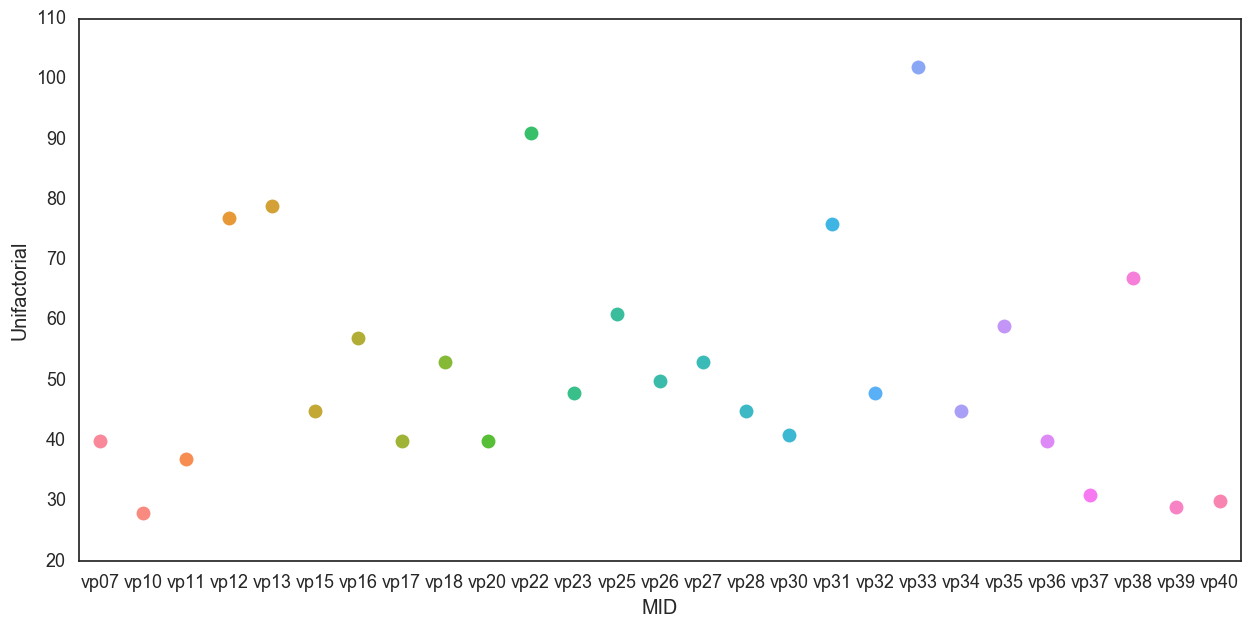

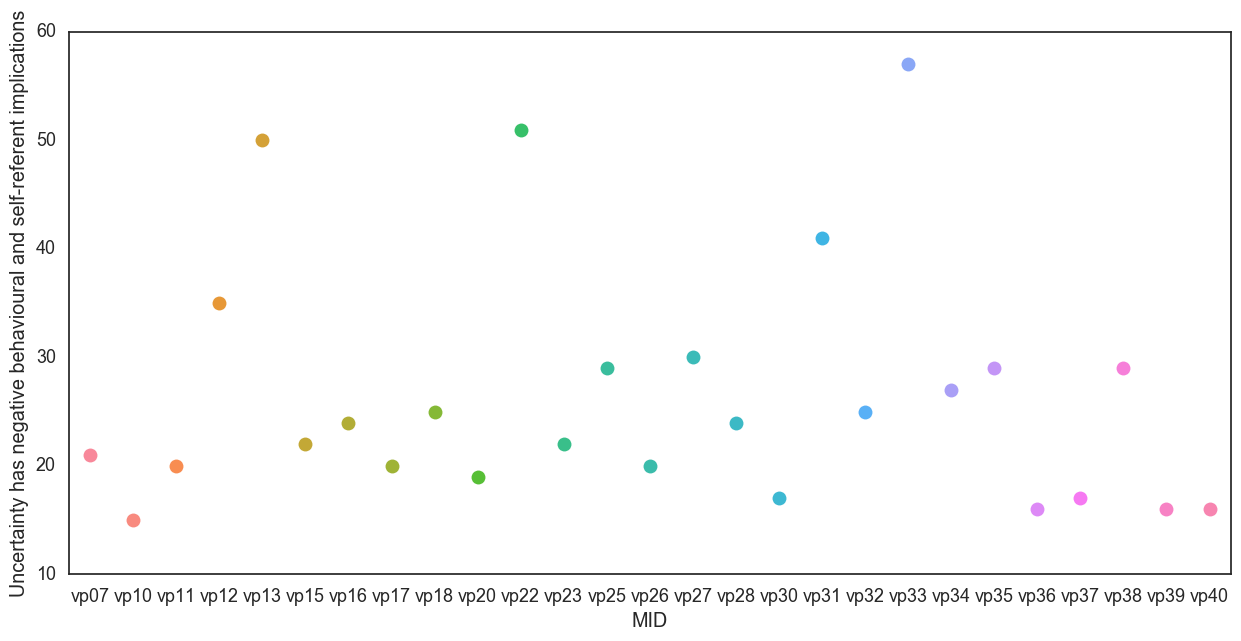

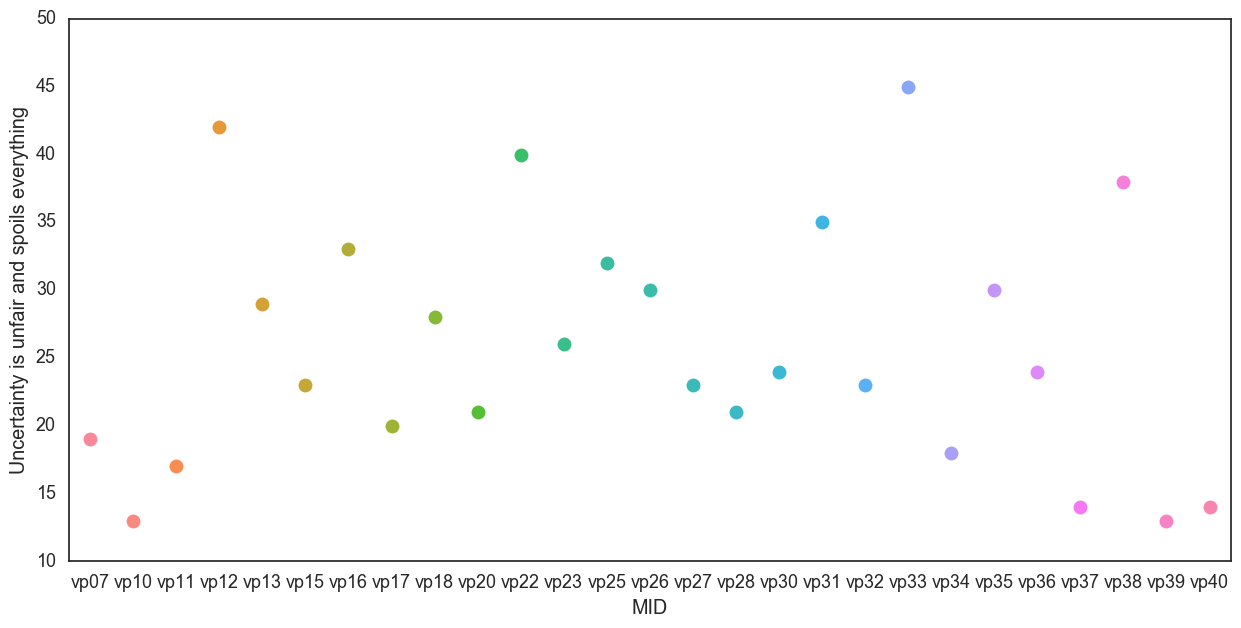

In [15]:
plotTraitperSub(IUS_df, y0 = 'Unifactorial', y1 = 'Uncertainty has negative behavioural and self-referent implications', y2 = 'Uncertainty is unfair and spoils everything')


## PSWQ

In [16]:
PSWQ_df = load_trait_data(sheet = 'PSWQ', header = 3, lastcol = 29, start = 18, end = 19)
PSWQ_df = PSWQ_df.rename(columns={'index': 'MID'})
PSWQ_df.head()

Question,level_0,MID,PSWQ
0,0,vp07,53
1,1,vp10,69
2,2,vp11,37
3,3,vp12,66
4,4,vp13,48


()

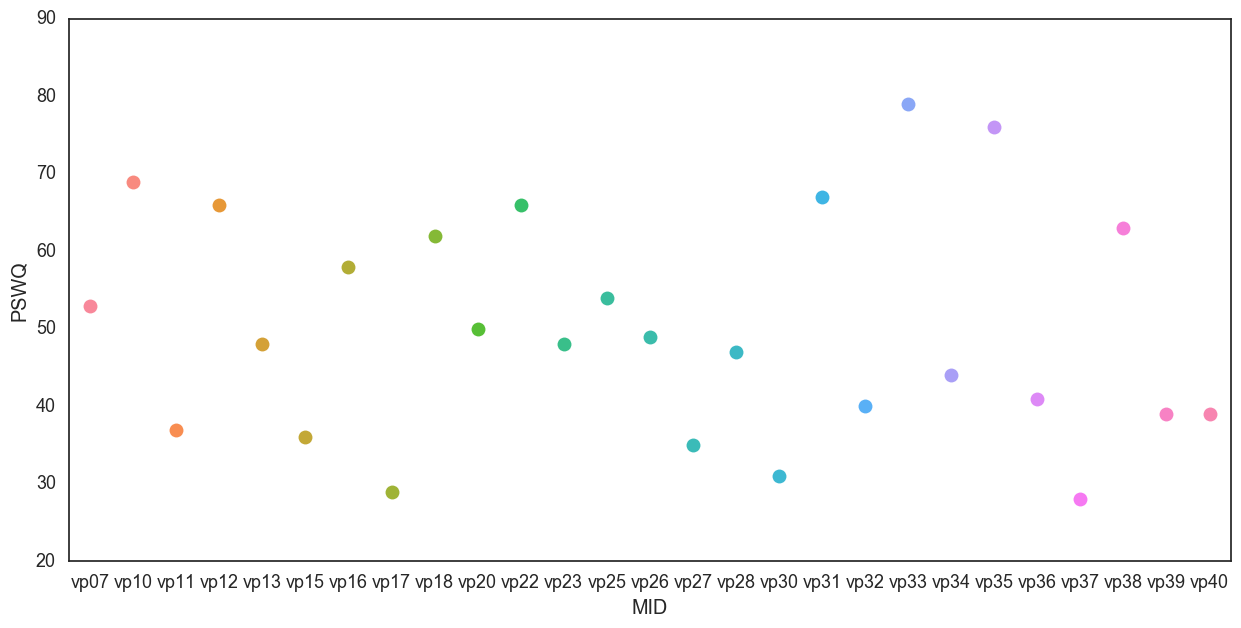

In [17]:
plotTraitperSub(PSWQ_df, y0 = 'PSWQ')


## CES-D

In [18]:
CESD_df = load_trait_data(sheet = 'CES-D', header = 3, lastcol = 30, start = 22, end = 27)
CESD_df = CESD_df.rename(columns={'index': 'MID'})
CESD_df.head()

IDs,level_0,MID,CESD,Depressive affect/ mood,Positive affect/ well-being,Somatic subscale,Inter-personal relations
0,0,vp06,0,0,0,0,0
1,1,vp07,7,0,3,4,0
2,2,vp10,25,10,6,9,0
3,3,vp11,5,0,2,2,1
4,4,vp12,7,3,2,2,0


()

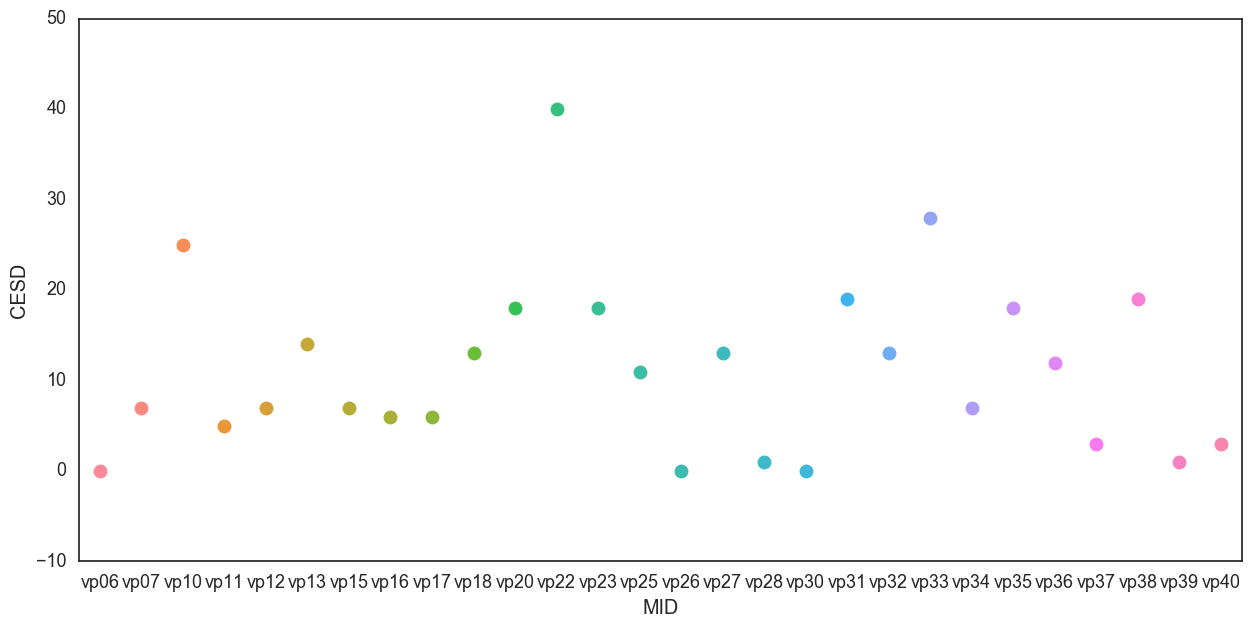

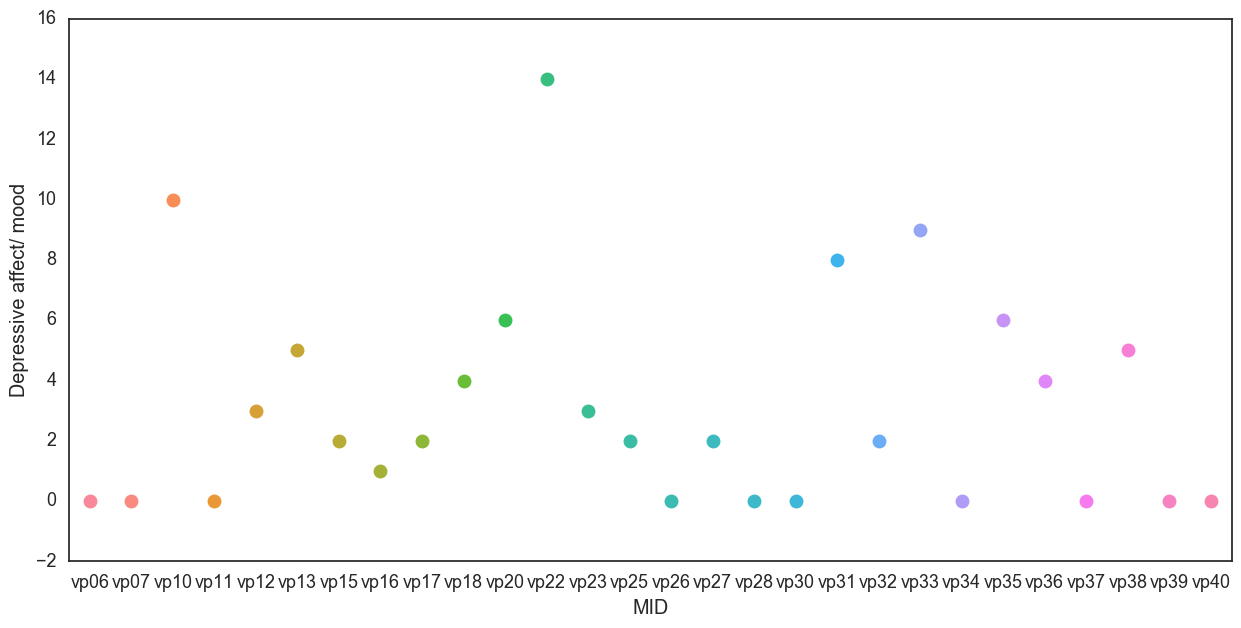

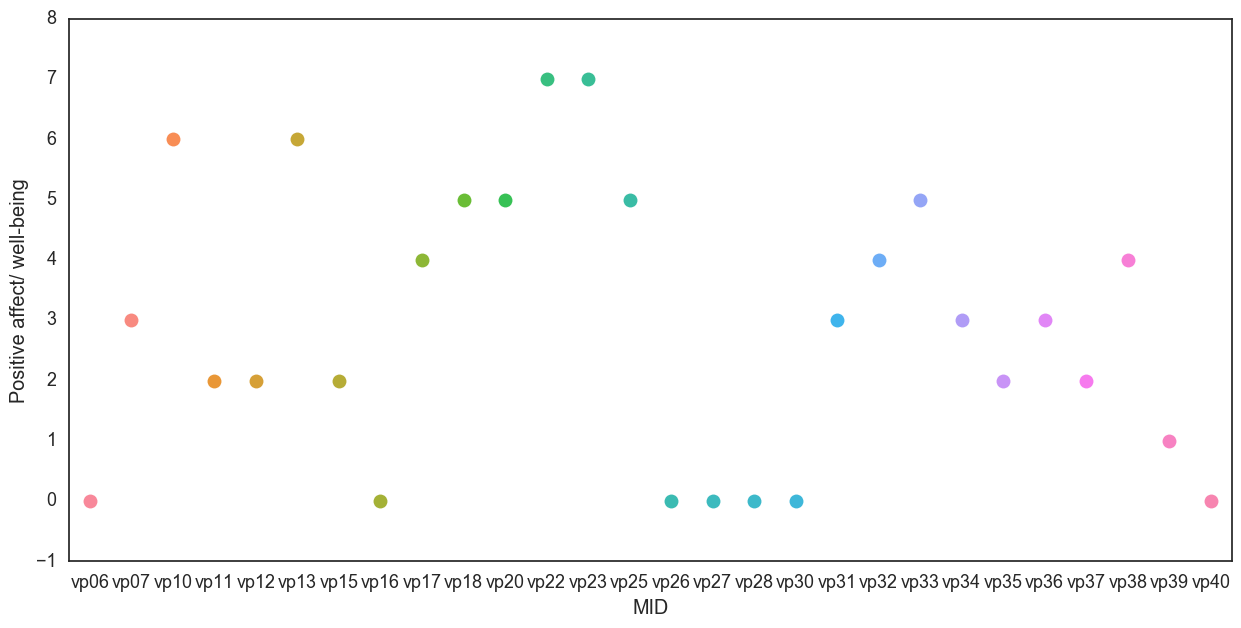

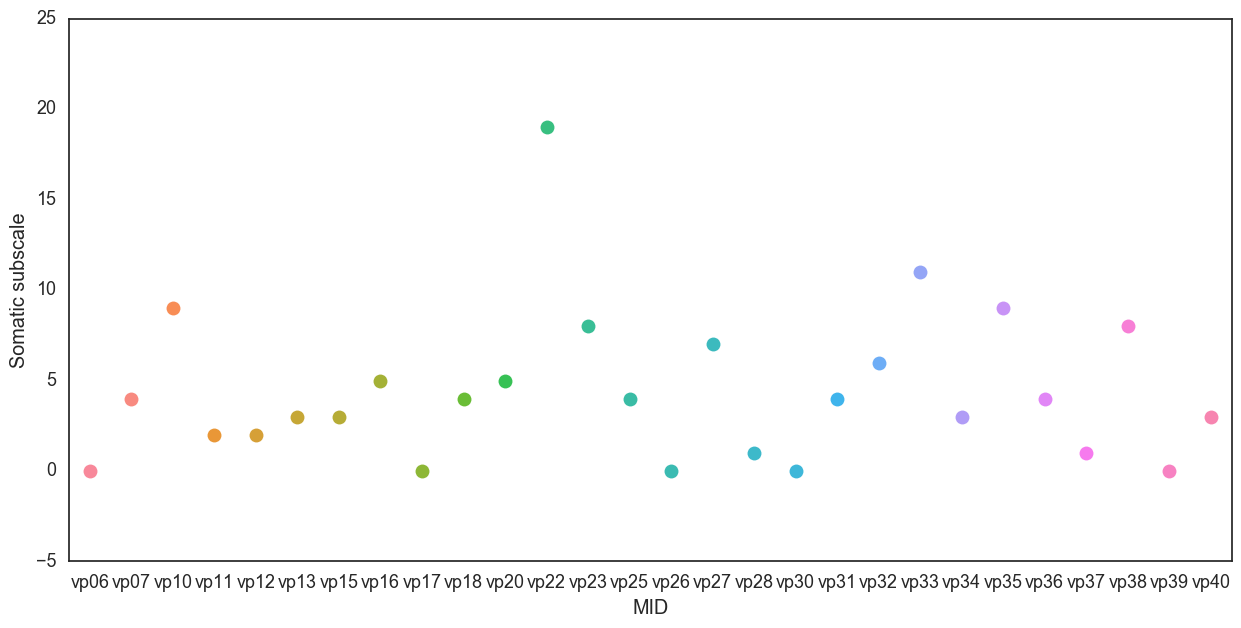

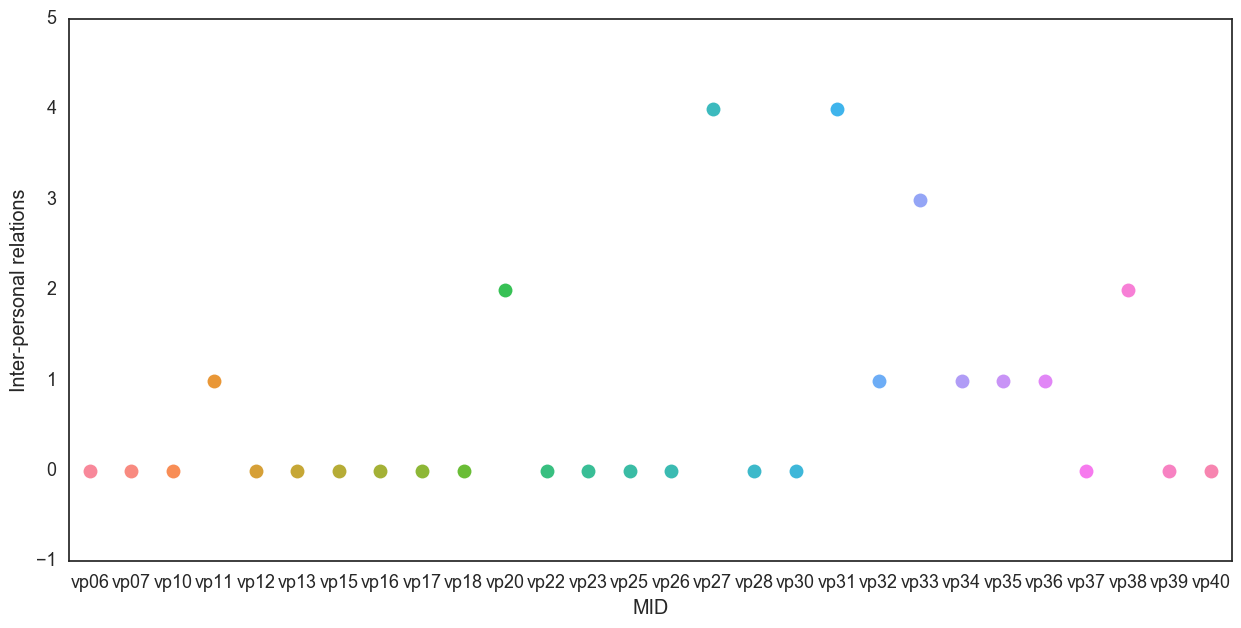

In [19]:
plotTraitperSub(CESD_df, y0 = 'CESD', y1 = 'Depressive affect/ mood', y2 = 'Positive affect/ well-being', y3 = 'Somatic subscale', y4 = 'Inter-personal relations')


## BFI2 - calculate scores in excel

In [20]:
BFI2_df = load_trait_data(sheet = 'BFI2', header = 3, lastcol = 30, start = 62, end = 70)
BFI2_df = BFI2_df.rename(columns={'index': 'MID'})
BFI2_df.head()

Question,level_0,MID,Extraversion,Agreeableness,Conscientiousness,Negative Emotionality,Open_Mindedness,Anxiety,Depression,Emotional Volatility
0,0,vp06,29,57,46,17,57,8,5,4
1,1,vp07,36,47,40,30,45,14,7,9
2,2,vp10,41,43,34,45,40,15,14,16
3,3,vp11,46,43,38,25,58,13,4,8
4,4,vp12,36,49,46,28,45,15,6,7


()

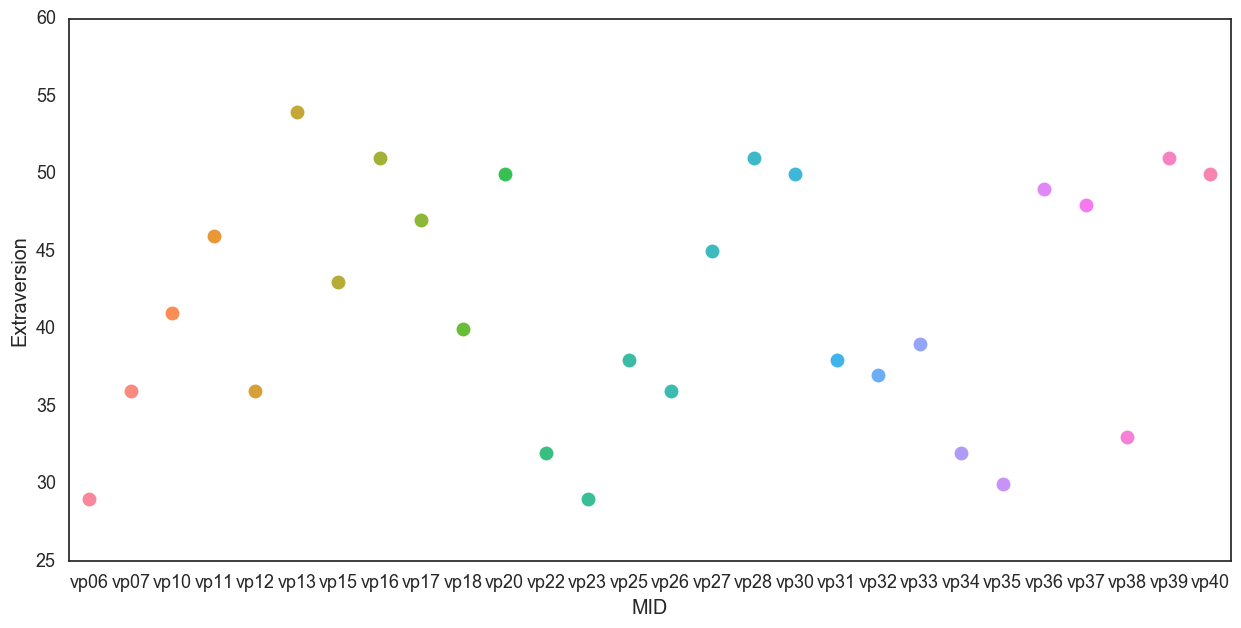

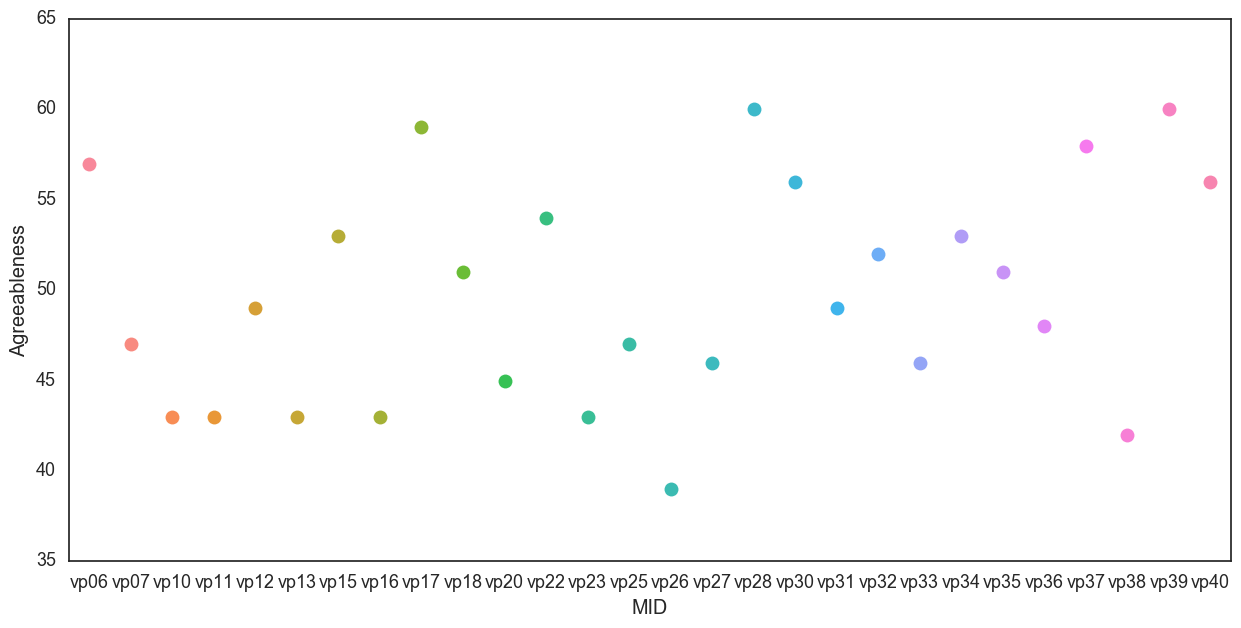

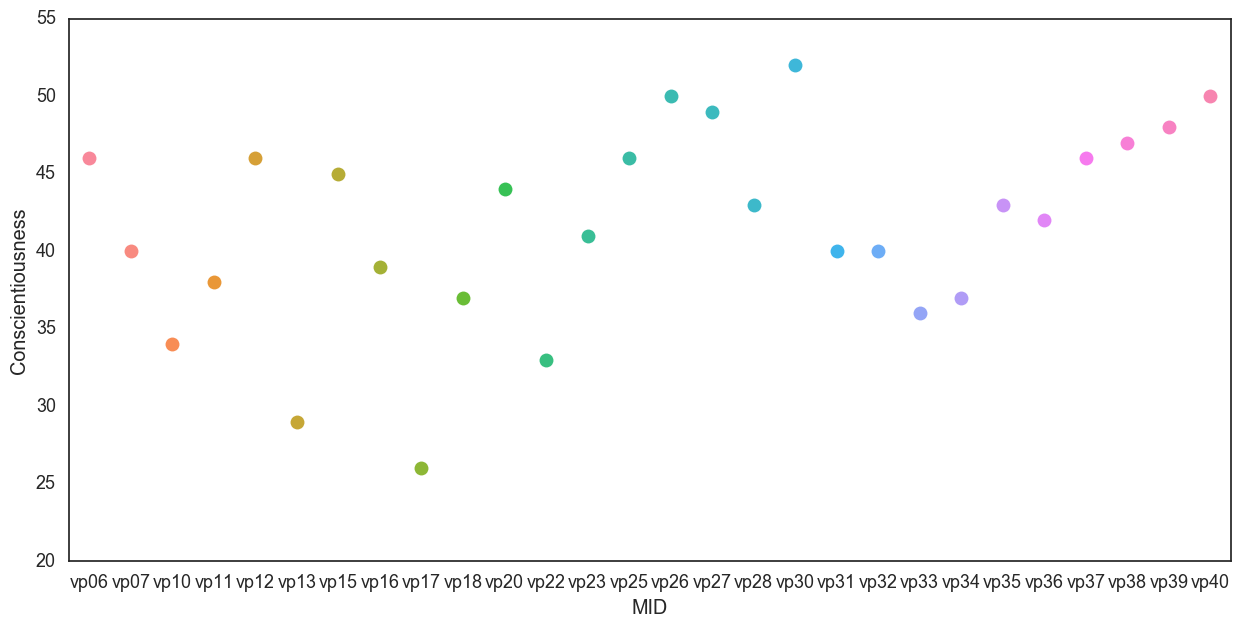

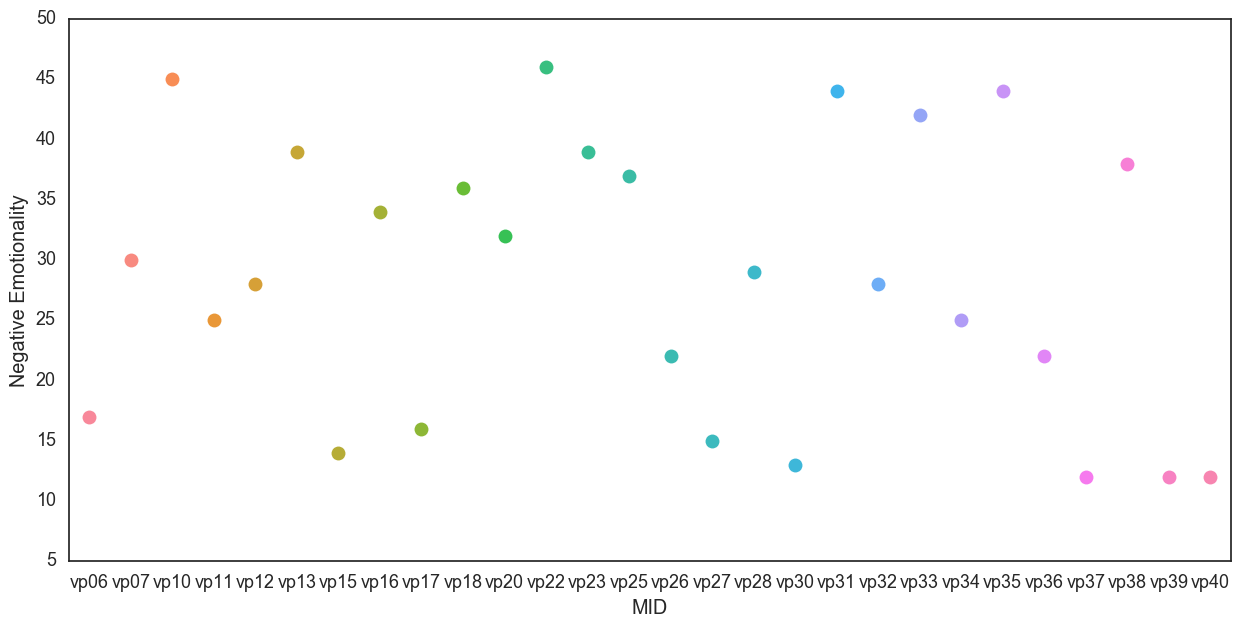

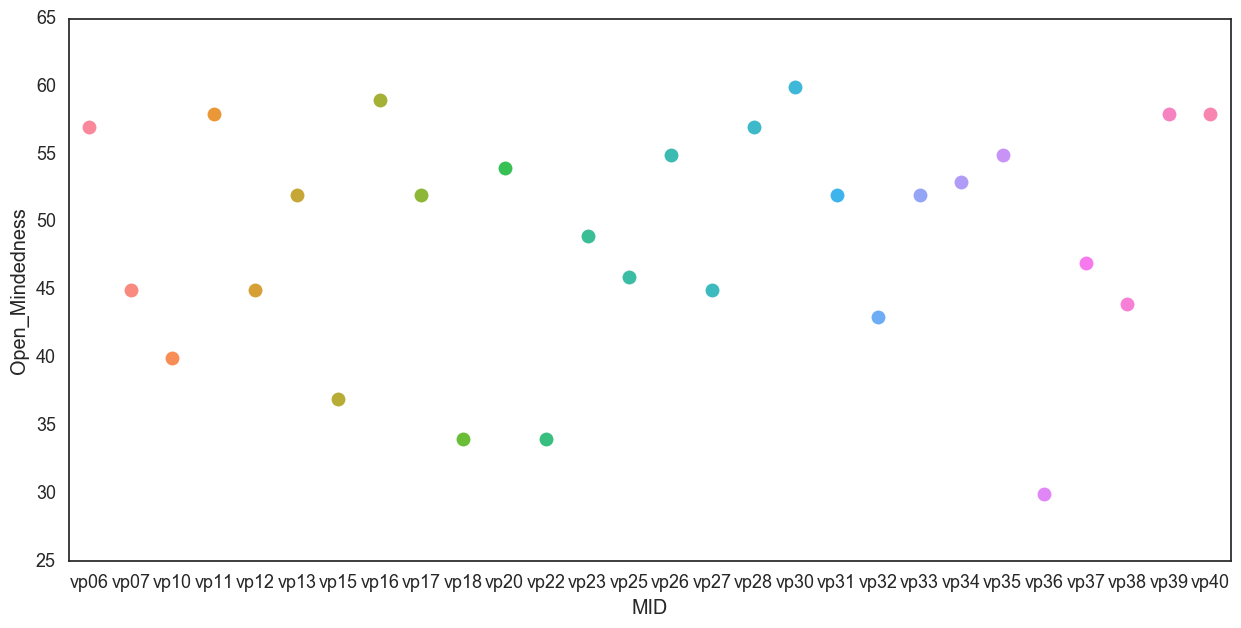

In [21]:
plotTraitperSub(BFI2_df, y0 = 'Extraversion', y1 = 'Agreeableness', y2 = 'Conscientiousness', y3 = 'Negative Emotionality', y4 = 'Open_Mindedness')


()

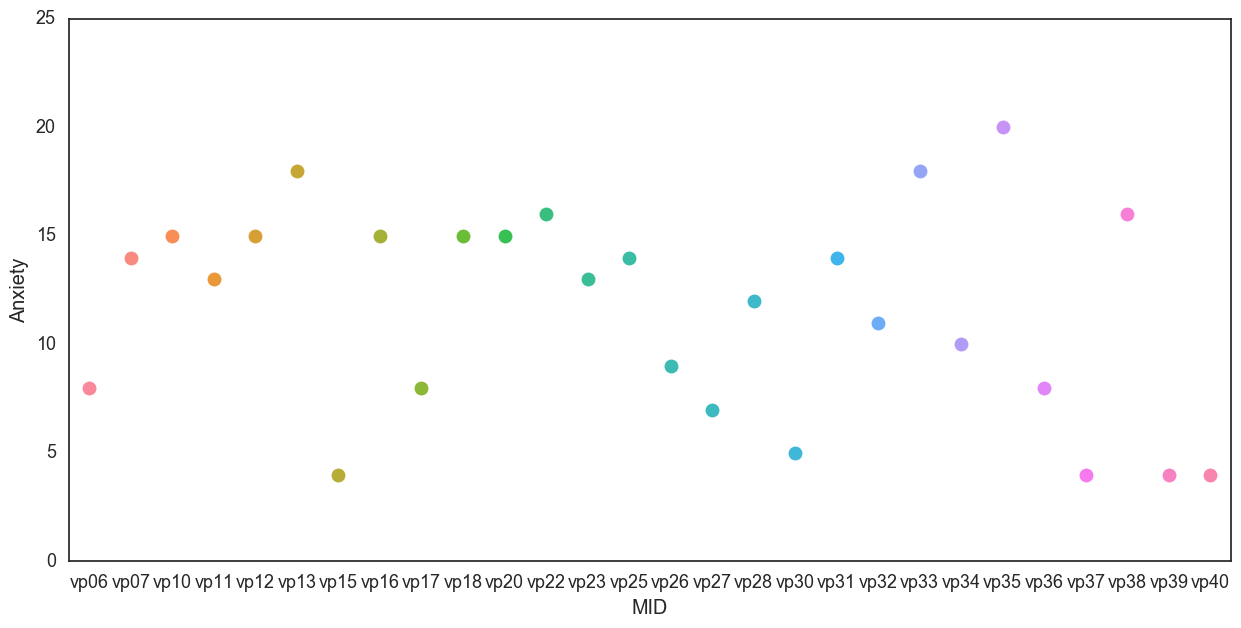

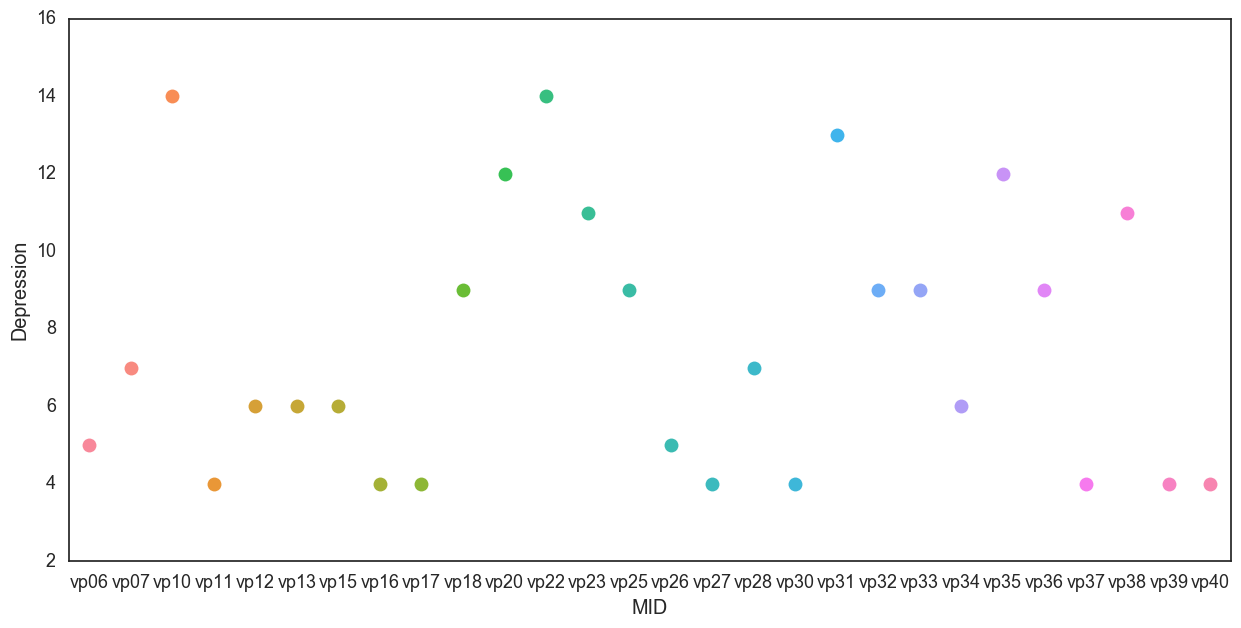

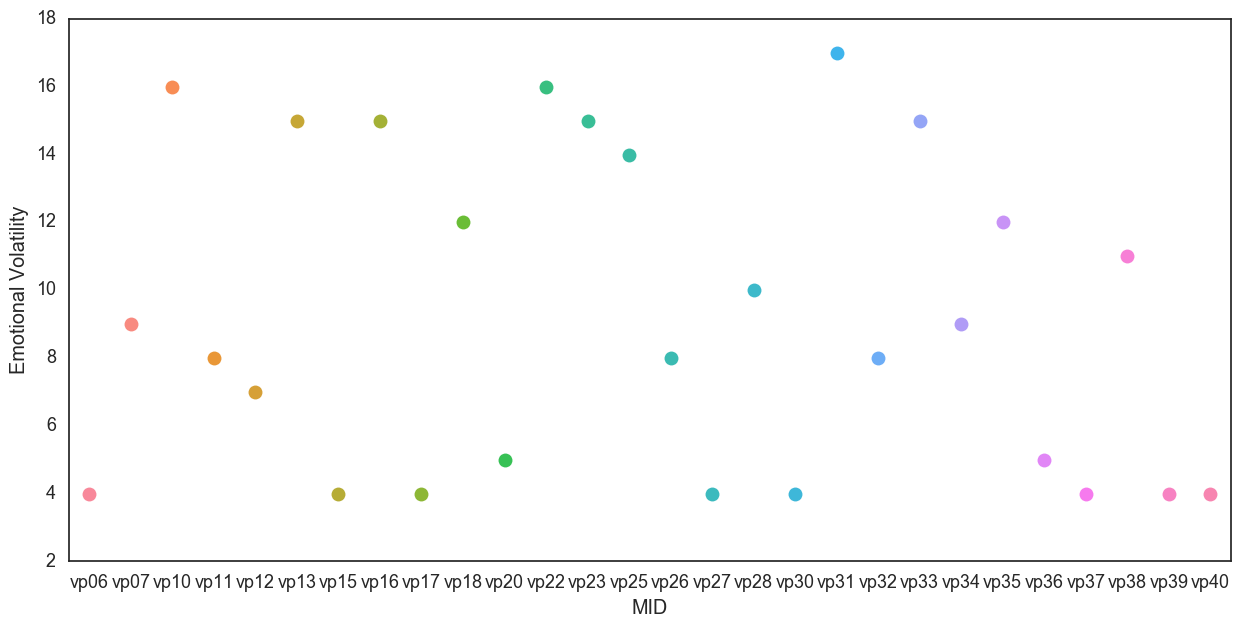

In [22]:
plotTraitperSub(BFI2_df, y0 = 'Anxiety', y1 = 'Depression', y2 = 'Emotional Volatility')


## EPQ

In [23]:
EPQ_df = load_trait_data(sheet = 'EPQ', header = 3, lastcol = 29, start = 92, end = 96)
EPQ_df = EPQ_df.rename(columns={'index': 'MID'})
EPQ_df.head()

IDs,level_0,MID,Neuroticism,Psychoticism,Lie,Extraversion
0,0,vp07,12,6,2,20
1,1,vp10,17,3,7,19
2,2,vp11,5,1,8,19
3,3,vp12,13,3,9,11
4,4,vp13,8,6,9,19


()

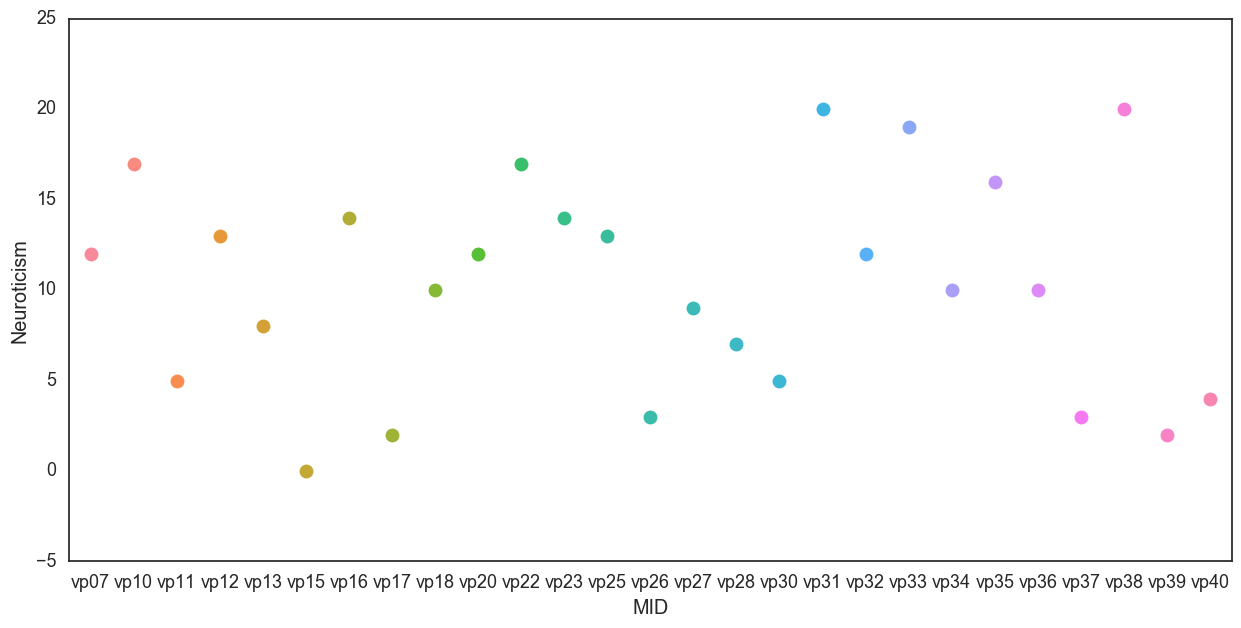

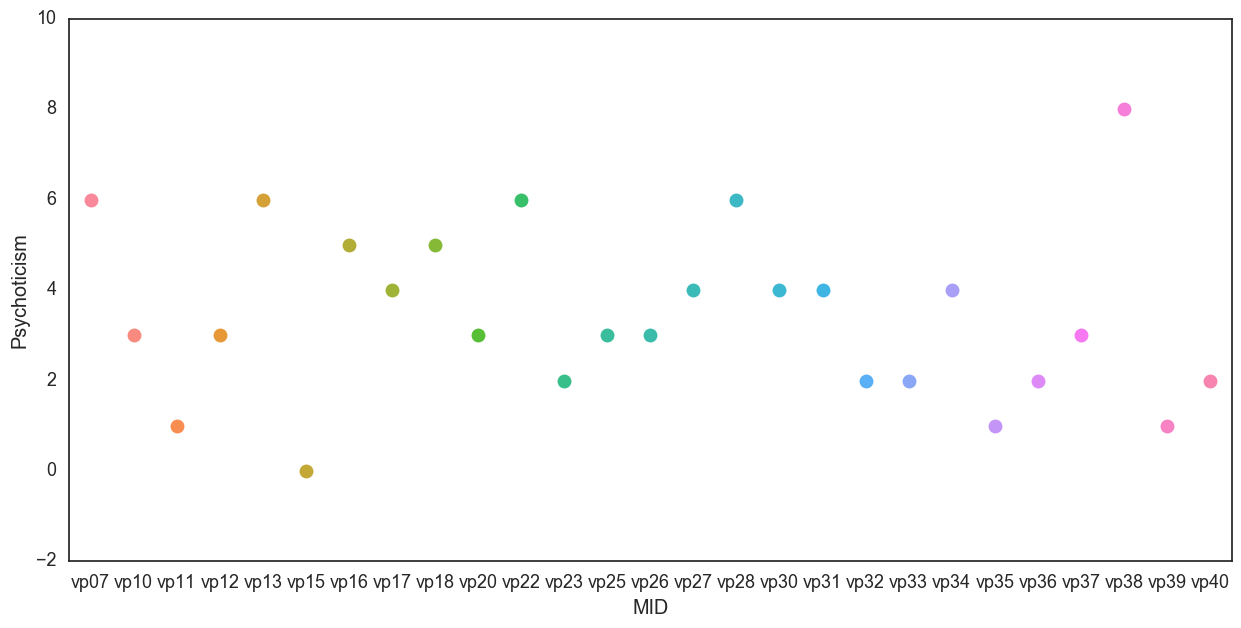

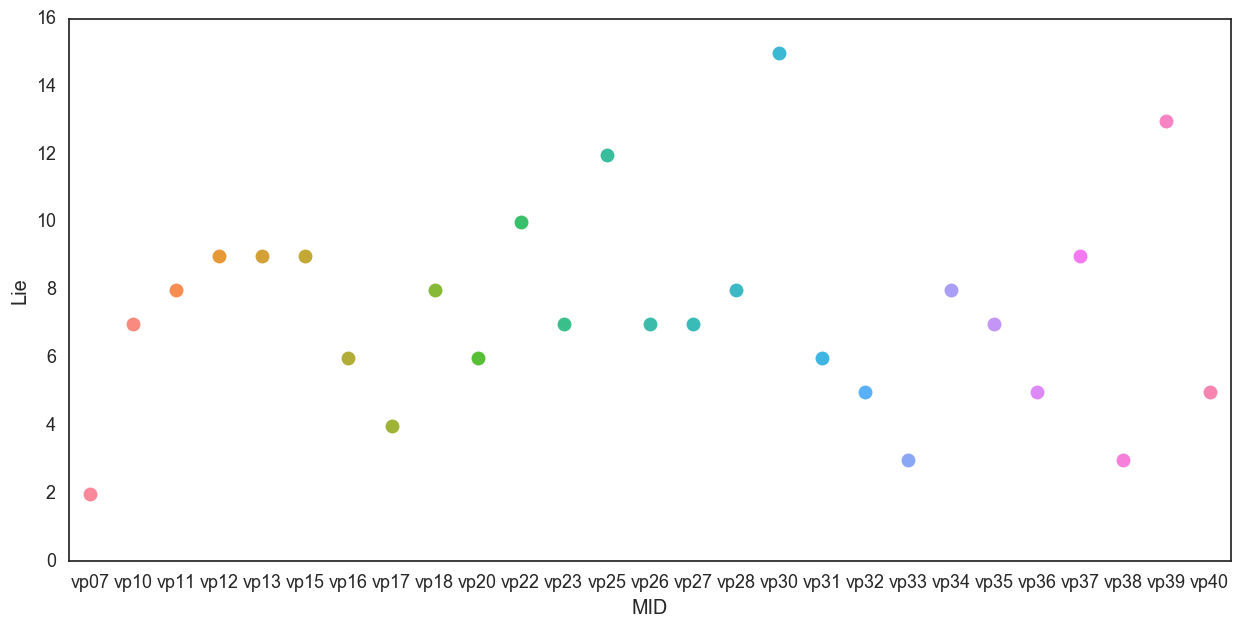

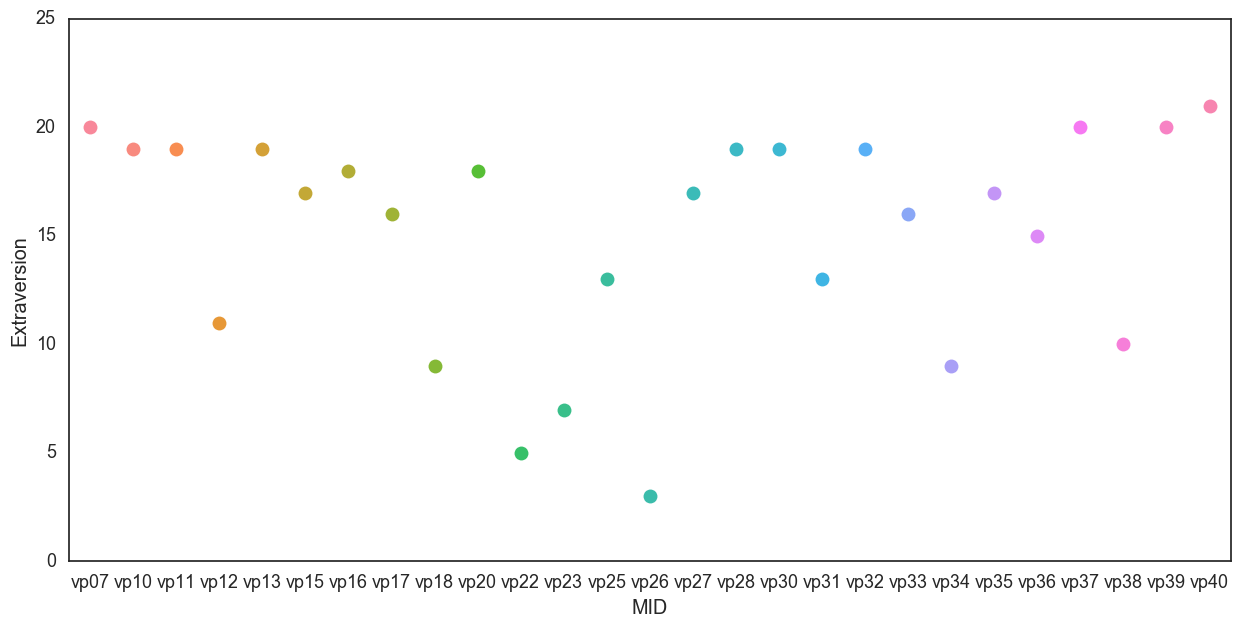

In [24]:
plotTraitperSub(EPQ_df, y0 = 'Neuroticism', y1 = 'Psychoticism', y2 = 'Lie', y3 = 'Extraversion')


## BB

In [25]:
BB_df = load_trait_data(sheet = 'BB', header = 3, lastcol = 29, start = 26, end = 30)
BB_df = BB_df.rename(columns={'index': 'MID'})
BB_df.head()

IDs,level_0,MID,BIS,BAS drive,BAS fun seeking,BAS reward responsiveness
0,0,vp07,19,8,6,7
1,1,vp10,18,7,3,11
2,2,vp11,13,5,9,10
3,3,vp12,20,9,6,12
4,4,vp13,12,6,7,7


()

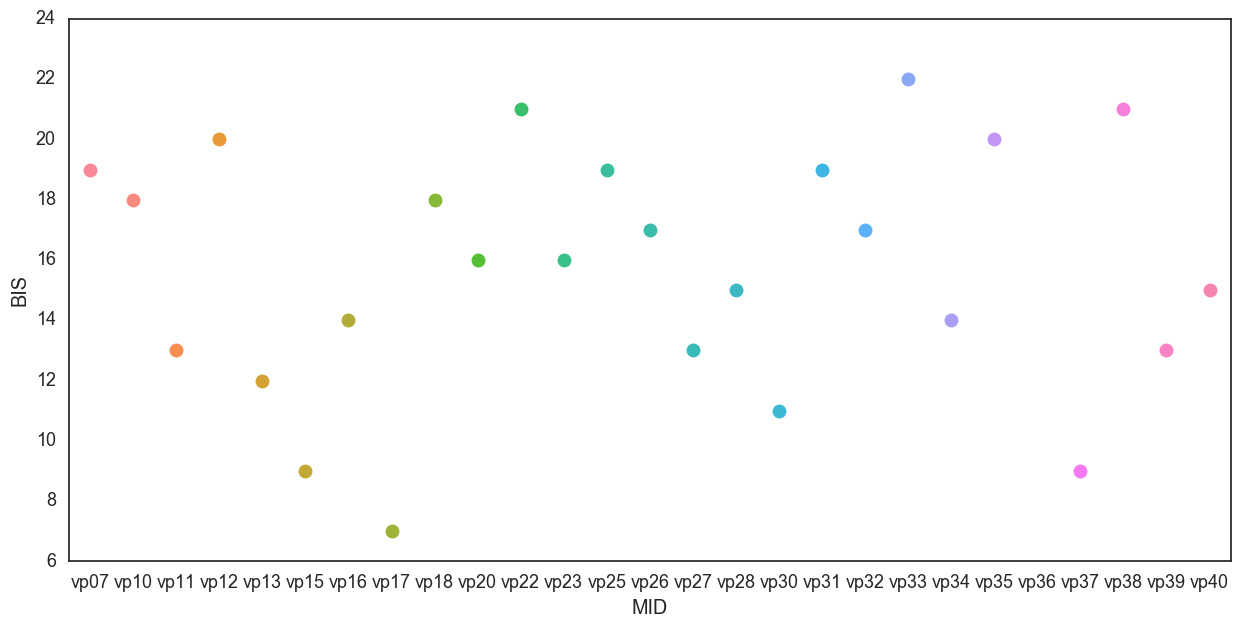

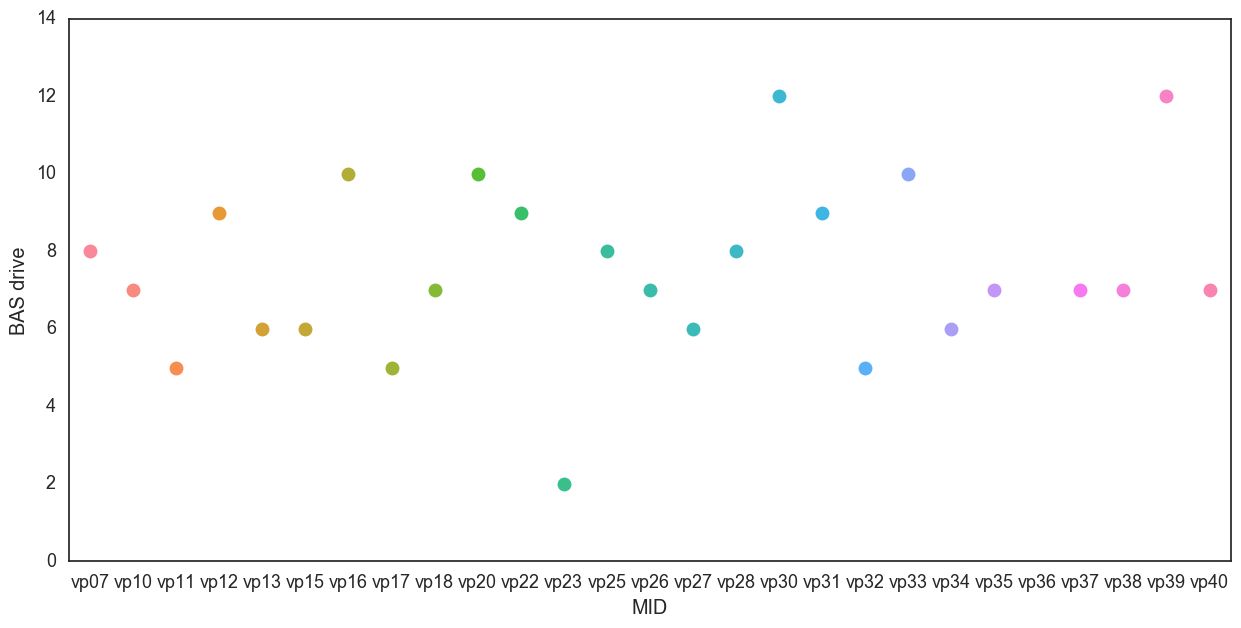

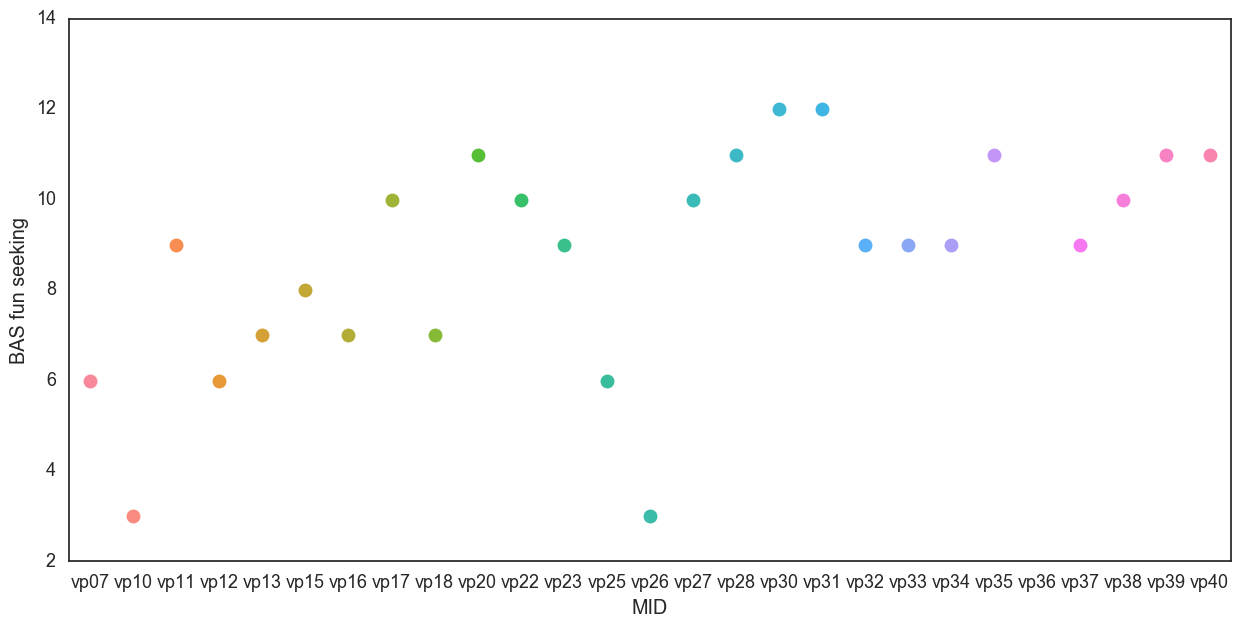

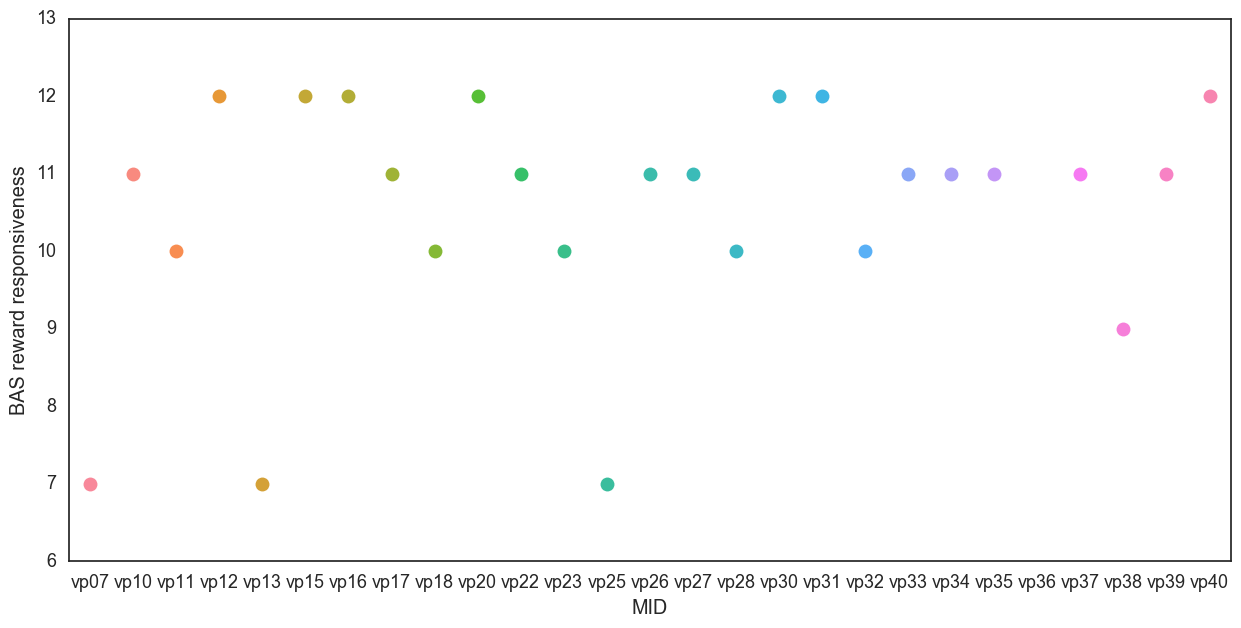

In [26]:
plotTraitperSub(BB_df, y0 = 'BIS', y1 = 'BAS drive', y2 = 'BAS fun seeking', y3 = 'BAS reward responsiveness')


## OCIR - calculate scores in excel file
Scores are generated by adding the item scores. The possible range of scores is 0-72. Mean
score for persons with OCD is 28.0 (SD = 13.53). Recommended cutoff score is 21, with scores at
or above this level indicating the likely presence of OCD. 

This is true vor vp22 and vp38 (latter is right at cut off)

In [27]:
OCIR_df = load_trait_data(sheet = 'OCIR', header = 3, lastcol = 29, start = 20, end = 21)
OCIR_df = OCIR_df.rename(columns={'index': 'MID'})
OCIR_df.head()

Question,level_0,MID,OCIR
0,0,vp07,17
1,1,vp10,17
2,2,vp11,7
3,3,vp12,7
4,4,vp13,11


()

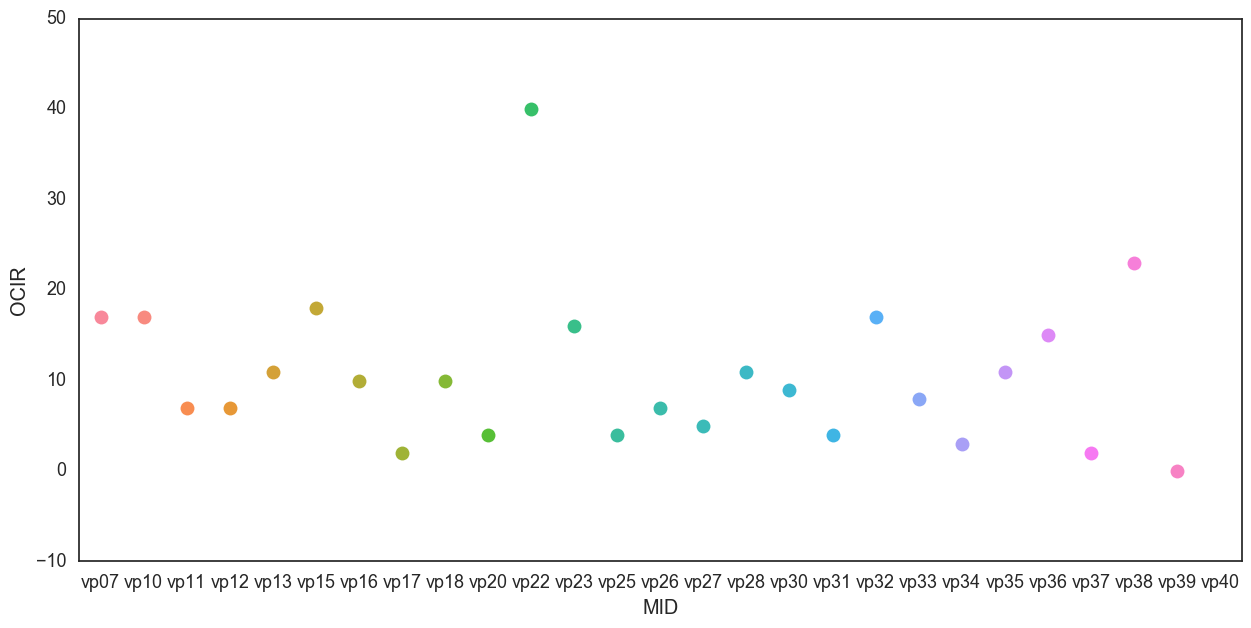

In [28]:
plotTraitperSub(OCIR_df, y0 = 'OCIR')


# Load and prepare model param data (triplets)

## model fit and no brainer

### gainloss

In [29]:
df_list = []
vp_perform_gainloss_list = []
vp_nb_gainloss_list = []
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30', '31',
           '32', '33', '34', '35', '36', '37', '38', '39', '40']
for vp in vp_list:
    path = os.path.join(os.getcwd(),'..','data','data_gainloss_logfiles','vp' + vp + '_gainloss_processed.csv')
    df = pd.read_csv(path, sep=",")
    #preprocess gainloss data
    df=preprocess_gainloss(df)
    #preprocess data
    df = preprocess(df)
    #store prepocessed data in list that contains data for all subjects (for later analysis)
    df_list.append(df)
    #create subset with unambiguous trials for no brainer analysis
    nb_df = drop_ambi_trials(df)
    #create variables indicating whether left or right was the better option
    better_choice_gainloss(nb_df)
    #indicate whether the better box was chosen
    nb_df = right_choice(nb_df)
    #only keep trials that are 'no brainers'
    nb_df = keep_nobrainers(nb_df)
    #calculate performance
    vp_perform_gainloss = ['vp' + vp, vp_perf(nb_df)]
    #store each vp performance in list
    vp_perform_gainloss_list.append(vp_perform_gainloss)
    #vp performance sectionwise
    vp_nb_gainloss = nb_df.groupby('section').mean().add_prefix('gainloss_')[['gainloss_choseBetter']]
    vp_nb_gainloss['MID'] = 'vp'+ vp
    vp_nb_gainloss_list.append(vp_nb_gainloss)
    
#make dataframe for nb performance
nobrainer_gainloss = pd.DataFrame(vp_perform_gainloss_list,columns=['MID','nbperf'])

#dataframe for single subject (last one) to try out code
gainloss_ls_df = df

#Merge dataframe list to single dataframe. "inner": Just take columns which exist in all dataframes    
gainloss_df = pd.concat(df_list, ignore_index = True, join = 'inner') 

C:\Users\Hanna\Anaconda2\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Hanna\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### shock

In [30]:
df_list = []
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']
vp_perform_shock_list = []
vp_nb_shock_list = []
section_list = ['1', '2', '3']
for vp in vp_list:
    df = []
    for sec in section_list:
        path = os.path.join(os.getcwd(),'..','data','data_shock_logfiles','Expt1Pain_Behaviour_vp' + vp + '_' + sec + '.txt')
        df_dummy = pd.read_csv(path, sep="\t", skiprows = [0])
        df_dummy = df_dummy[:-1] #deletes last row of each section as it does not contain trial data
        df_dummy['MID'] = 'vp'+ vp
        df_dummy['section'] = sec
        df_dummy.columns = df_dummy.columns.str.replace(' ','')
        df.append(df_dummy)
    
    #create a df that contains data from all sections    
    df = pd.concat(df, ignore_index = True, join = 'inner')
    #preprocess shock data
    df = preprocess_shock(df)
    #preprocess data
    df = preprocess(df)
    #store prepocessed data in list that contains data for all subjects (for later analysis)
    df_list.append(df)
    #create subset with unambiguous trials for no brainer analysis
    nb_df = drop_ambi_trials(df)
    #create variables indicating whether left or right was the better option
    better_choice_shock(nb_df)
    #indicate whether the better box was chosen
    nb_df = right_choice(nb_df)
    #only keep trials that are 'no brainers'
    nb_df = keep_nobrainers(nb_df)
    #calculate performance
    vp_perform_shock = ['vp' + vp, vp_perf(nb_df)]
    #store each vp performance in list
    vp_perform_shock_list.append(vp_perform_shock)
    #vp performance sectionwise
    vp_nb_shock = nb_df.groupby('section').mean().add_prefix('shock_')[['shock_choseBetter']]
    vp_nb_shock['MID'] = 'vp'+ vp
    vp_nb_shock_list.append(vp_nb_shock)
    
#make dataframe for nb performance
nobrainer_shock = pd.DataFrame(vp_perform_shock_list,columns=['MID','nbperf'])

#dataframe for single subject (last one) to try out code
shock_ls_df = df

#create complete df for shock condition with all vps        
shock_df = pd.concat(df_list, ignore_index = True, join = 'inner')

../functions/NoBrainer_Analysis_AllinOne.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['left_better']=lb
../functions/NoBrainer_Analysis_AllinOne.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['right_better']=rb


In [31]:
param_sets_split = {}
param_sets_split['0'] = ['mag_diff','prob_diff']
param_sets_split['1'] = ['mag_diff','prob_diff','ambiguityLevel']

## gainloss

In [32]:
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '40']
resultnames = ['bic','aic','pseudoR2','pred_acc', 'llr_pvalue']
model_param_df = np.array(['','','',3.0,3.0])
model_summary_df = nobrainer_gainloss

for vp in vp_list:
    
    df = gainloss_df[gainloss_df.MID == 'vp' + vp]
    MID = 'vp' + vp
        
    for split in ['ambig_gain','ambig_loss','unambig_gain','unambig_loss']:
        if 'unambig' in split:
            paramnum='0'
        else:
            paramnum='1'
            
        # Fit a model to each set of trials 
        out = fit_model_split_amb_unamb_gain_loss(df, whichreturn= split, params=param_sets_split[paramnum],zscore=True)
        
        modelname = out['modelname']

        for result in resultnames:
            model_summary_df.loc[(model_summary_df.MID== 'vp' + vp),result+'_'+split]=out[result]

        params = out['params']
        se=out['se']
        for param in params.index:
            paramn = param.replace('_loss','')
            paramn = paramn.replace('_gain','')
            paramn = paramn.replace('_amb','')
            paramn = paramn.replace('_rl','')
            row = np.array([MID,paramn,split,params[param],se[param]])
            model_param_df=np.vstack((model_param_df,row))

model_param_df = pd.DataFrame(model_param_df,columns=['MID','parameter','split','beta','se'])
model_param_df.drop(0,inplace=True) #df.index[0]
model_param_df['beta']=model_param_df['beta'].astype('float')
model_param_df_gainloss = model_param_df
model_summary_gainloss_df = model_summary_df

## shock

In [33]:
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']
resultnames = ['bic','aic','pseudoR2','pred_acc', 'llr_pvalue'] 
model_param_df = np.array(['','','',3.0, 3.0])
model_summary_df = nobrainer_shock

for vp in vp_list:
    
    df = shock_df[shock_df.MID == 'vp' + vp]
    MID = 'vp' + vp
        
    for split in ['ambig_shock','unambig_shock']:
        #print(split)
        if 'unambig' in split:
            paramnum='0'
        else:
            paramnum='1'
        # Fit a model to the ambiguous gain trials 
        out = fit_model_split_amb_unamb_gain_loss(df, whichreturn= split, params=param_sets_split[paramnum],zscore=True)
        
    
        modelname = out['modelname']

        for result in resultnames:
            model_summary_df.loc[(model_summary_df.MID== 'vp' + vp),result+'_'+split]=out[result]

        params = out['params']
        se = out['se']
        for param in params.index:
            paramn = param.replace('_gain','')
            paramn = paramn.replace('_amb','')
            paramn = paramn.replace('_rl','')
            row = np.array([MID,paramn,split,params[param],se[param]])
            model_param_df=np.vstack((model_param_df,row))

model_param_df = pd.DataFrame(model_param_df,columns=['MID','parameter','split','beta', 'se'])
model_param_df.drop(0,inplace=True) #df.index[0]
model_param_df['beta']=model_param_df['beta'].astype('float')
model_param_df_shock = model_param_df        
model_summary_shock_df = model_summary_df
   

## combine gainloss and shock data and match loss/shock to gain

In [34]:
model_param_df = pd.concat([model_param_df_gainloss, model_param_df_shock])

In [35]:
# reverse beta parameters for shock and loss to match gain
model_param_df.loc[(model_param_df.split == 'ambig_shock') & (model_param_df.parameter == 'mag_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'ambig_shock')& (model_param_df.parameter == 'mag_diff'),'beta']*-1
model_param_df.loc[(model_param_df.split == 'unambig_shock') & (model_param_df.parameter == 'mag_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'unambig_shock') & (model_param_df.parameter == 'mag_diff'),'beta']*-1

model_param_df.loc[(model_param_df.split == 'ambig_shock') & (model_param_df.parameter == 'prob_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'ambig_shock') & (model_param_df.parameter == 'prob_diff'),'beta']*-1
model_param_df.loc[(model_param_df.split == 'unambig_shock') & (model_param_df.parameter == 'prob_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'unambig_shock') & (model_param_df.parameter == 'prob_diff'),'beta']*-1
model_param_df.loc[(model_param_df.split == 'ambig_loss') & (model_param_df.parameter == 'prob_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'ambig_loss') & (model_param_df.parameter == 'prob_diff'),'beta']*-1
model_param_df.loc[(model_param_df.split == 'unambig_loss') & (model_param_df.parameter == 'prob_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'unambig_loss') & (model_param_df.parameter == 'prob_diff'),'beta']*-1


## remove bad fitting subjects

In [36]:
print(len(model_param_df_shock))
model_param_df_shock = model_param_df_shock.loc[model_param_df_shock['MID']!='vp29',]
model_param_df_shock = model_param_df_shock.loc[model_param_df_shock['MID']!='vp19',]
print(len(model_param_df_shock))

210
196


In [37]:
print(len(model_param_df_gainloss))
model_param_df_gainloss = model_param_df_gainloss.loc[model_param_df_gainloss['MID']!='vp29',]
model_param_df_gainloss = model_param_df_gainloss.loc[model_param_df_gainloss['MID']!='vp19',]
print(len(model_param_df_gainloss))

406
378


In [38]:
print(len(model_param_df))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
print(len(model_param_df))

616
574


## triplet data frame

### ambiguous trials

In [39]:
triplet_intercept = triplet(model_param_df, 'intercept', ambiguous=True)
triplet_magdiff = triplet(model_param_df, 'mag_diff', ambiguous=True)
triplet_probdiff = triplet(model_param_df, 'prob_diff', ambiguous=True)
triplet_ambiguityLevel = triplet(model_param_df, 'ambiguityLevel', ambiguous=True)

### unambiguous trials

In [40]:
triplet_intercept_unambi = triplet(model_param_df, 'intercept', ambiguous=False)
triplet_magdiff_unambi = triplet(model_param_df, 'mag_diff', ambiguous=False)
triplet_probdiff_unambi = triplet(model_param_df, 'prob_diff', ambiguous=False)
triplet_ambiguityLevel_unambi = triplet(model_param_df, 'ambiguityLevel', ambiguous=False)

### combine with STAI data - AMBIGUOUS TRIALS

In [41]:
triplet_intercept_STAI = triplet_intercept.merge(STAI_df, 'left')
triplet_probdiff_STAI = triplet_probdiff.merge(STAI_df, 'left')
triplet_magdiff_STAI = triplet_magdiff.merge(STAI_df, 'left')
triplet_ambiguityLevel_STAI = triplet_ambiguityLevel.merge(STAI_df, 'left')

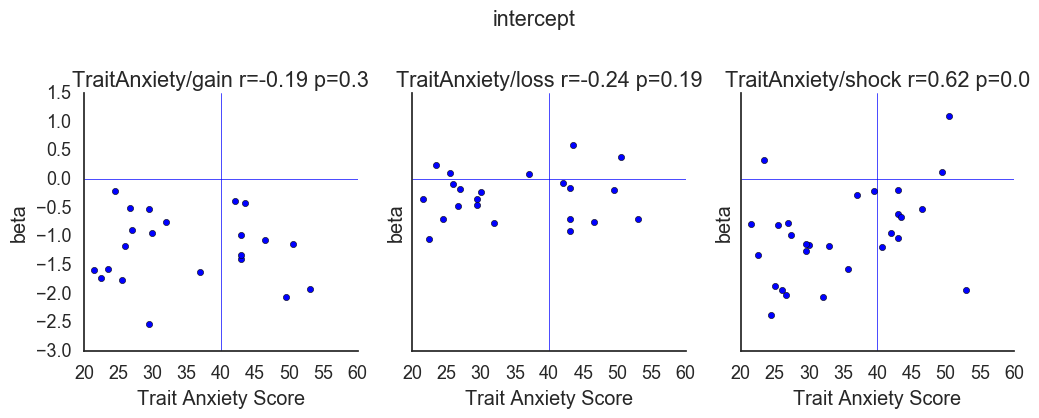

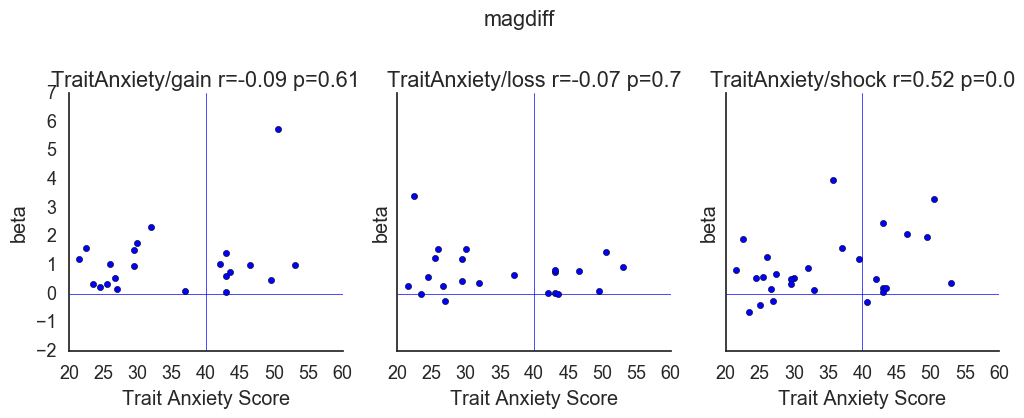

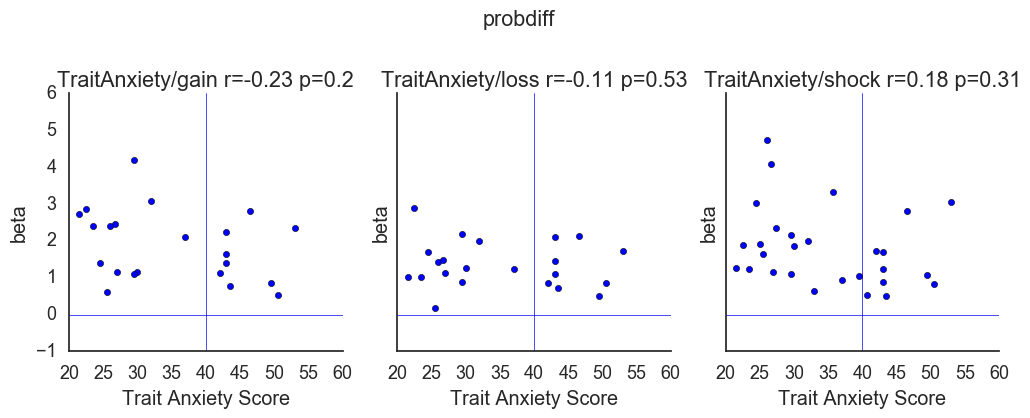

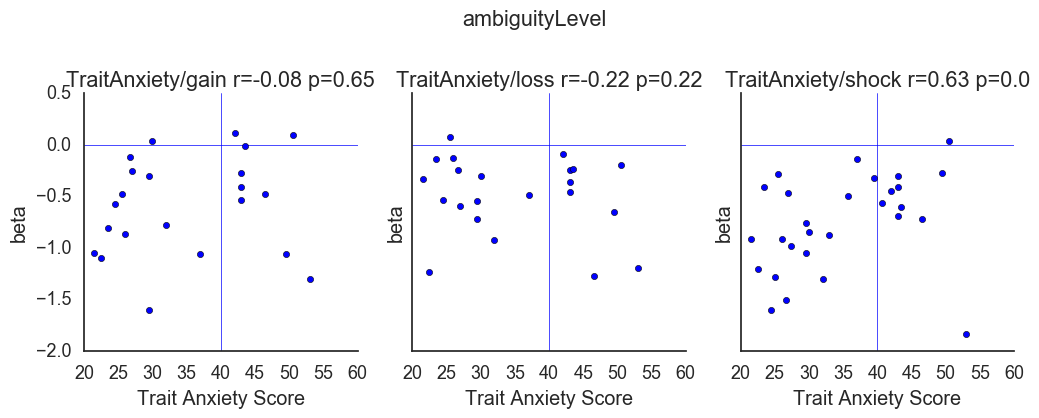

In [42]:
plotTrait_rl(triplet_intercept_STAI, 'intercept')
plotTrait_rl(triplet_magdiff_STAI, 'magdiff')
plotTrait_rl(triplet_probdiff_STAI, 'probdiff')
f = plotTrait_rl(triplet_ambiguityLevel_STAI, 'ambiguityLevel')

### combine with STAI data - UNAMBIGUOUS TRIALS

In [43]:
triplet_intercept_STAI = triplet_intercept_unambi.merge(STAI_df, 'left')
triplet_probdiff_STAI = triplet_probdiff_unambi.merge(STAI_df, 'left')
triplet_magdiff_STAI = triplet_magdiff_unambi.merge(STAI_df, 'left')

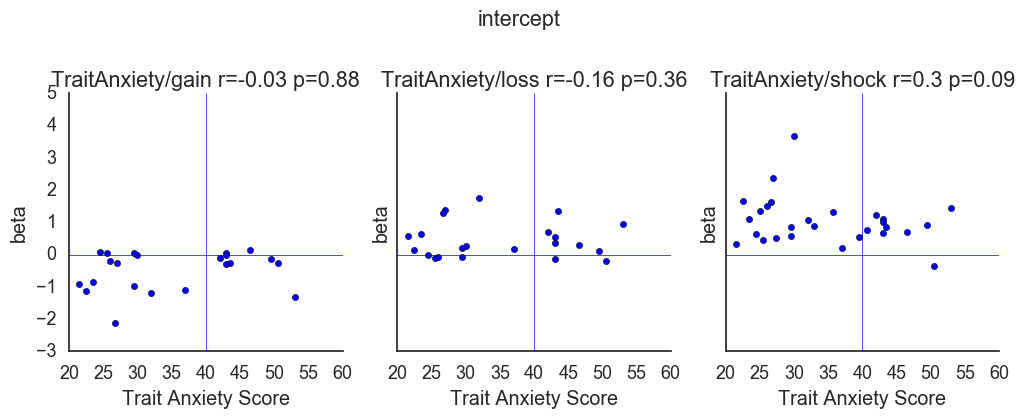

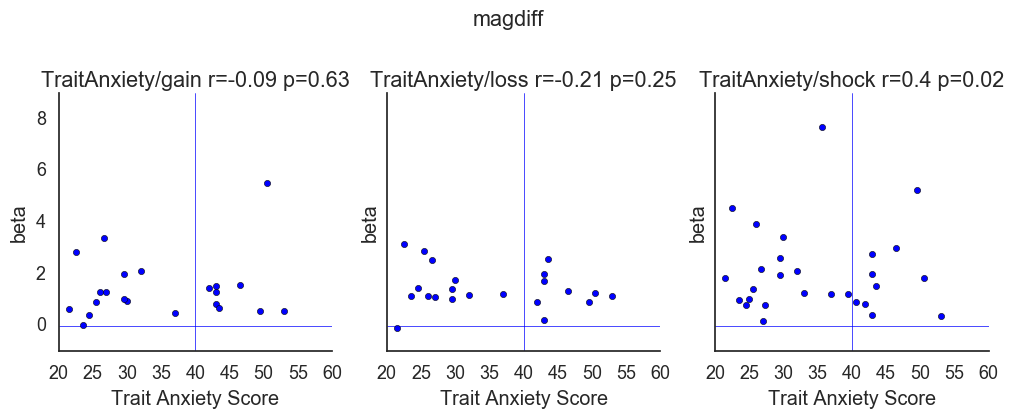

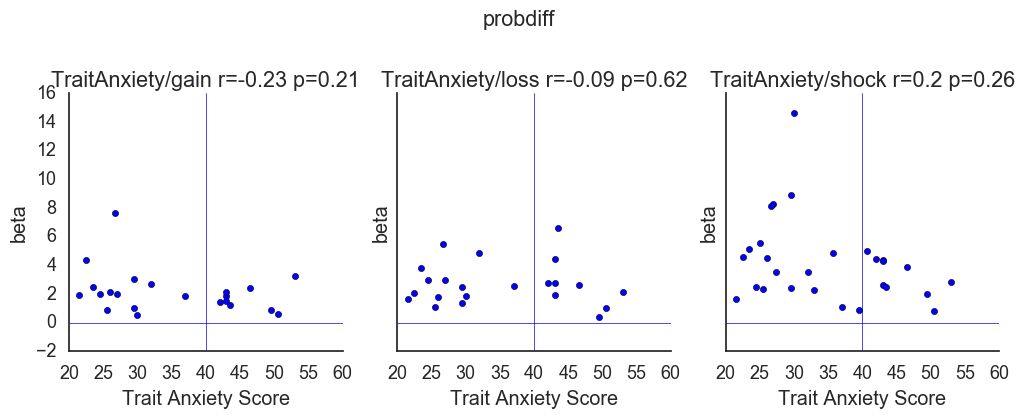

In [44]:
plotTrait_rl(triplet_intercept_STAI, 'intercept')
plotTrait_rl(triplet_magdiff_STAI, 'magdiff')
f = plotTrait_rl(triplet_probdiff_STAI, 'probdiff')